# Identifying Patterns of Successful Games

# Contents <a id='back'></a>
* [1. Introduction](#intro)
* [2. Data Exploration](#data_exploration)
    * [Conclusion](#data_exploration_conclusion)
* [3. Data Cleaning](#data_cleaning)
    * [Missing Values](#missing_values)
        * [Name and Genre](#name_and_genre)
        * [Year of Release](#year_of_release)
        * [Critic and User Scores](#critic_and_user)
        * [Rating](#rating)
* [4. Exploratory Data Analysis (EDA)](#eda)
    * [Number of Released Games per Year](#number_of_games)
    * [Overall Global Sales per Platform](#overall_global_sales)
    * [Emerging and Declining Platforms](#up_down_platform)
    * [Current Growth Status of Platforms](#platform_growth)
    * [Yearly Game Sales per Platform](#game_sales_per_platform)
    * [Effect of User and Professional Reviews on Sales](#scores_sales)
    * [Sales of the Same Games from Different Platforms](#same_games)
    * [Distribution and Sales of Games per Genre](#sales_per_genre)
* [5. Regional Sales Analysis](#regional_sales)
    * [Regional Market Shares per Platform](#regional_per_platform)
    * [Regional Market Shares per Genre](#regional_per_genre)
    * [Relationship between ESRB Rating and Game Sales](#rating_sales)
* [6. Hypothesis Testing](#hypothesis_testing)
    * [Hypothesis 1](#hypothesis_1)
    * [Hypothesis 2](#hypothesis_2)
* [7. General Conclusion](#general_conclusion)

## 1. Introduction <a id='intro'></a>
This project is to perform an analysis for the online gaming store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. This project will analyse these data and identify patterns that determine whether a game succeeds or not. This will allow the store to plan a campaign for 2017.

### Purpose

This project aims to answer the following quesions:
1. What are the signs or patterns of a successful game?
2. Which game genres or platforms achieve a better sales?
3. Do user and professional scores affects sales?

### Hypothesis
Two hypotheses are formulated:
1. Average user scores of the Xbox One and PC platforms are the same.
2. Average user scores for the Action and Sports genres are different.

[Back to Contents](#back)

## 2. Data Exploration <a id='data_exploration'></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Load dataset
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
# Have a look at the dataset
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


The dataset has 16715 rows (games) and 11 columns of information related to each game.

**According to the documentation:**

**Data for 2016 may be incomplete.**

**Description of data**
- Name: the name of the game
- Platform: PS2, Wii, X360, etc
- Year_of_Release: the year when the game is first released
- Genre: role-playing, action, puzzle, etc
- NA_sales: sales in North American in million USD
- EU_sales: sales in Europe in million USD
- JP_sales: sales in Japan in million USD
- Other_sales: sales in other countries in million USD
- Critic_Score: score (out of a maximum of 100) rated by professionals
- User_Score: score (out of a maximum of 10) rated by users
- Rating: the age and content rating of the game

**Issue**
- The column names will be changed to lowercase.

In [4]:
# Check if there is any missing value
data.isna().sum().sort_values(ascending = False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [5]:
# Get the general information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Issues**
- There are missing values in six of the columns, namely `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` and `Rating`.
- The data type of `User_Score` should be `float64`, an `object` data type indicates that there is a mixture of `float64` and other data type(s).
- The data type of `Year_of_Release` should be `int64`, if the missing values can be fixed, the data type will be changed to `int64`.

In [6]:
# Look at the statictics of the numerical columns
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


No obvious outlier or anomaly.

**Conclusion:** <a id='data_exploration_conclusion'></a>

From the overview of the data, the dataset are sufficient to conduct the relevant analysis and test the hypotheses. However, there are

**Issues need to be addresed later**
- The column names will be changed to lowercase.
- The missing values in `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` and `Rating` need to be investigated.
- `User_Score` has an `object` data type which indicates that there is a mixture of `float64` and other data type(s).
- If the missing values in `Year_of_Release` can be fixed, the data type will be changed to `int64`.

[Back to Contents](#back)

## 3. Data Cleaning <a id='data_cleaning'></a>

---

The following functions are created to automate the works in data cleaning stage.

In [7]:
# Create a function to calculate the number and percentage of missing values
def calc_na(column):
    """
    This function calculate and print the number and percentage of
    missing values in a specific column
    """
    
    print(f'The number of missing values in {column}:',
          f'{data[column].isna().sum()}')
    print(f'The percentage of missing values in {column}:',
          f'{data[column].isna().mean():.2%}')

In [8]:
# Create a function to compare the distribution of numerical data of the original dataframe 
# and the dataframe with specific column of missing values
def check_na_distr_num(column):
    """
    This function compare the distribution of numerical data of 
    the original dataframe and the dataframe with specific missing values
    """
    # Create the dataframe with the specific missing values
    na_data = data.query(f'{column}.isna()')
    
    # Create a list of numerical columns to be compared 
    num_factors = ['year_of_release', 'na_sales', 'eu_sales', 'jp_sales',
                   'other_sales', 'critic_score', 'user_score']
    
    # Check the distribution of numerical columns
    print('original data')
    display(data[num_factors].describe())
    print('-'*80)
    print(f'{column}_na_data')
    display(na_data[num_factors].describe())

In [9]:
# Create a function to compare the distribution of categorical data of the original dataframe 
# and the dataframe with specific column of missing values
def check_na_distr_cat(column):
    """
    This function compare the distribution of categorical data of 
    the original dataframe and the dataframe with specific missing values
    """
    # Create the dataframe with the specific missing values
    na_data = data.query(f'{column}.isna()')
    
    # Create a list of categorical columns to be compared  
    cat_factors = ['platform', 'genre', 'rating']
    
    # Exclude the comparison with the check_column itself
    if column in cat_factors:
        cat_factors.remove(column)
    
    for factor in cat_factors:
        # Find the distribution of the original data and the na data
        original_data_distr = data[factor].value_counts(normalize = True)
        na_data_distr = na_data[factor].value_counts(normalize = True)        
        
        # Create a dataframe to compare the distribution
        compare_data = pd.DataFrame({
            'distribution in original data': original_data_distr,
            f'distribution in {column}_na data': na_data_distr
        }).reset_index()          
        
        # Modify the compare_data to have a better visualisation
        compare_data.rename(columns = {'index': factor}, inplace = True)
        compare_data.sort_values(by = f'distribution in {column}_na data',
                                 ascending = False, inplace = True)
        compare_data.index = range(compare_data.shape[0])
        
        # Show the top 10 counts in  compare_data
        display(compare_data.head(10))
        print('-'*80)

In [10]:
def sns_displot(data, title, xlabel, ylabel, x = None, y = None, hue = None,
                multiple = 'layer', height = 5, aspect = 1): 
    """
    This function plots a histogram to show the distribution in each group
    """
    
    # Set up figure
    sns.set_style('whitegrid')
    
    # Plot a vertical distribution graph
    if x is not None:
        if hue is not None:
            # Drop the zero count categories
            cat_count = data.groupby(x)[hue].count()
            non_zero_index = cat_count[cat_count != 0].index
            data = data[data[x].isin(non_zero_index)]
        
        sns.displot(data = data, x = x, hue = hue, multiple = multiple,
                    height = height, aspect = aspect, bins = len(data[x].unique()))
        # Show percentage instead of relative frequency for filled bar charts
        if multiple == 'fill':
            plt.yticks(ticks = np.arange(0, 1, step = 0.1), labels = np.arange(0, 100, step = 10))
    
    # Plot a horizontal distribution graph
    elif y is not None:
        if hue is not None:
            # Drop the zero count categories
            cat_count = data.groupby(y)[hue].count()
            non_zero_index = cat_count[cat_count > 0].index
            data = data[data[y].isin(non_zero_index)]
        
        sns.displot(data = data, y = y, hue = hue, multiple = multiple,
                    height = height, aspect = aspect, bins = len(data[y].unique()))
        # Show percentage instead of relative frequency for filled bar charts
        if multiple == 'fill':
            plt.xticks(ticks = np.arange(0, 1, step = 0.1), labels = np.arange(0, 100, step = 10))

    plt.title(title, fontsize=15, fontweight='bold')
    plt.xlabel(xlabel, fontsize=13, fontweight='bold')
    plt.ylabel(ylabel, fontsize=13, fontweight='bold')
    
    plt.show()

In [11]:
def group_mean_median(group, check_list):
    """
    This function calculate the columns mean and median in 
    a DataFrameGroupby object
    """
    for item in check_list:        
        print(item)
        display(data
         .groupby(group)[item]
         .agg(['count', 'mean', 'median']) 
         .sort_values('count', ascending = False)
         .reset_index()
        )

        print('-'*50)   

[Back to Contents](#back)

---

Let's start the data cleaning stage.

In [12]:
# Check for duplicates
data.duplicated().sum()

0

In [13]:
# Change the column names to lower case
data.columns = data.columns.str.lower()

# Check the column names
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [14]:
# Figure out why the data type of user_score is object
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

The `user_score` has a non numeric value of `tbd`. If a `user_score` is `tbd`, it is likely the game has no reviews or not enough reviews from users. Hence, we can treat `tbd` as `nan`.

In [15]:
# Replace tbd with nan
data['user_score'].replace('tbd', np.nan, inplace = True)

# Change the data type of user_score to float64
data['user_score'] = data['user_score'].astype('float64')

# Check the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


According to wikipedia (source: https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board), the ESRB `rating` system is listed as below:

- `E`: Everyone
- `EC`: Early Childhood
- `E10+`: Everyone 10+
- `T`: Teen, ages 13 and above
- `M`: Mature 17+
- `AO`: Adults Only 18+
- `RP`: Rating Pending, used in promotional materials for games which have not yet been assigned a final rating by the ESRB
- `RP 17+`: Rating Pending - Likely Mature

**Retired Rating**
- `K-A`: Kids to Adults, replaced with `E` since 1998

We will replace `K-A` with `E` to ensure the wording consistency.

In [16]:
# Replace KA with E in the rating column
data['rating'].replace('K-A', 'E', inplace = True)

# Check the list of unique values
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

[Back to Contents](#back)

### Missing Values <a id='missing_values'></a>

To deal with the missing values, it is important to know the following two information:
1. The size (percentage) of the missing values.
2. Whether the missing values have any pattern. In this part, we will compare the distribution of the original data with the distribution of the data with specific missing values to check if the missing values show any pattern.
    - For the numerical columns, the distribution will be checked by using `describe()`
    - For the categorical columns, a table will be created to compare the percentage distribution. 

In data exploration stage, we know that there are only two missing values in `name` and `genre`, let's start with these two columns first.

**`name` and `genre`** <a id='name_and_genre'></a>

In [17]:
# Check the number and percentage of missing values
calc_na('name')

The number of missing values in name: 2
The percentage of missing values in name: 0.01%


In [18]:
# Check the two missing values in name
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Both of the two missing values in `name` and `genre` exist in the same rows. These two rows will be dropped since 5 out of 11 columns have missing values and the `year_of_release` of `1993` is 'too old' to forecast the sales in 2017.

In [19]:
# Drop the rows with missing values in name and genre
data = data.dropna(subset = ['name']).reset_index(drop = True)

# Check the number of missing values in name
data['name'].isna().sum()

0

[Back to Contents](#back)

**`year_of_release`** <a id='year_of_release'></a>

In [20]:
# Find the number and percentage of mising values
calc_na('year_of_release')

The number of missing values in year_of_release: 269
The percentage of missing values in year_of_release: 1.61%


In [21]:
# Have a look at some rows with missing values in year_of_release
year_na = data.query('year_of_release.isna()')

year_na.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


There is only 1.61% of missing values in `year_of_release`. Since `year_of_release` is a basic informtion of a game (we can actually fill them one by one by searching online information), these missing values could be due to human or system errors and the data is highly like missing completely at random (**MCAR**). Let's have a check.

In [22]:
# Compare the distributions of numerical data of original data and missing values data
check_na_distr_num('year_of_release')

original data


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,7590.000000
mean,2006.486256,0.263302,0.145045,0.077625,0.047343,68.967679,7.125046
std,5.875525,0.813565,0.503359,0.308871,0.186742,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


--------------------------------------------------------------------------------
year_of_release_na_data


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000,127.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416,7.049606
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740,1.536688
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000,1.800000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000,6.400000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000,7.400000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000,8.150000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000,9.500000


In [23]:
# Compare the distributions of categorical data of original data and missing values data
check_na_distr_cat('year_of_release')

,platform,distribution in original data,distribution in year_of_release_na data
0,PS2,0.129301,0.126394
1,Wii,0.078980,0.126394
2,DS,0.128702,0.111524
3,X360,0.075510,0.111524
4,PS3,0.079639,0.092937
5,XB,0.049303,0.078067
6,2600,0.007958,0.063197
7,PC,0.058278,0.063197
8,PSP,0.072339,0.059480
9,GC,0.033268,0.052045


--------------------------------------------------------------------------------


,genre,distribution in original data,distribution in year_of_release_na data
0,Action,0.201580,0.230483
1,Sports,0.140489,0.156134
2,Misc,0.104709,0.107807
3,Shooter,0.079160,0.100372
4,Racing,0.074732,0.085502
5,Role-Playing,0.089631,0.063197
6,Simulation,0.052235,0.059480
7,Fighting,0.050799,0.044610
8,Puzzle,0.034704,0.040892
9,Adventure,0.077963,0.037175


--------------------------------------------------------------------------------


,rating,distribution in original data,distribution in year_of_release_na data
0,E,0.401347,0.381215
1,T,0.297618,0.309392
2,E10+,0.142728,0.149171
3,M,0.157101,0.149171
4,RP,0.000302,0.011050
5,AO,0.000101,NaN
6,EC,0.000804,NaN


--------------------------------------------------------------------------------


In numerical columns, exclude the extreme values in `sales`, the distribtuions of the original data and the missing values data are almost identical. In categorical columns, both datasets have a similar distribution of data. Therefore, we can conclude that the missing values in `year_of_release` shows no pattern and assume the data is missing completely at random (**MCAR**).

Next, we will identify which factor has impact on the `year_of_release` so that we can fill the missing values accordingly.

In [24]:
# Have a look at the rows with missing values in year_of_release
year_na.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


By looking at some of these rows with missing values in `year_of_release`, three possible dependent factors will be considered  :
- `name`: There are quite a lot of famous games in the list and it is unlikely that the release years of these games are unknown. Most of the popular games are released in more than one platform and we may use the `year_of_release` data from other `platform` to fill in the missing values.
- `platform`: Every platform has a lifespan, the `year_of_release` must lie within this period of lifespan.
- `genre`: The popularity of a game `genre` varies across different decades, for example, the `puzzle` game `genre` like 'Tetris' are very popluar in 1980s.

The remaining variables, such as `sales`, `critic_score` and `user_score` are unlikely to have an impact on the values of `year_of_release` since games must be released first before these values become available.

Let's investigate on these possible factors.

In [25]:
# Count the number of platforms where a game was released on
data['platform_count'] = data.groupby('name')['platform'].transform('count')

# Check some games with more than one platform
data.query('platform_count > 1')[['name', 'platform_count']].head()

,name,platform_count
1,Super Mario Bros.,2
5,Tetris,2
16,Grand Theft Auto V,5
17,Grand Theft Auto: San Andreas,4
18,Super Mario World,2


In [26]:
# Check if any game has more than one platform and missing values in year_of_release
data.query('(platform_count > 1) & (year_of_release.isna())')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_count
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,4
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,4
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,7
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,4
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,4
...,...,...,...,...,...,...,...,...,...,...,...,...
16327,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,M,2
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,3
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,3
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,3


In [27]:
# Check on Madden NFL 2004 as an example
data.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_count
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,4
1880,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E,4
3888,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E,4
5707,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E,4


**Intermediate conclusion**

For the game 'Madden NFL 2004', there is a missing value in the `year_of_release` with `PS2` as a `platform`. Hence, some of the missing values in `year_of_release` can be filled based on same game `name`.

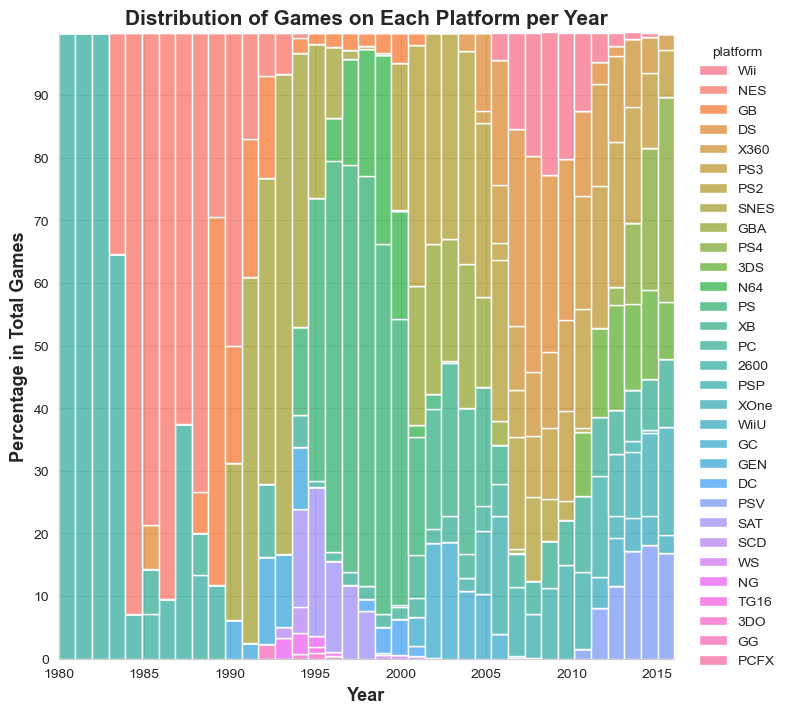

In [28]:
# For each year, plot a filled bar chart to show the distribtuion of released games on each platform
sns_displot(data = data, x = 'year_of_release', hue = 'platform', height = 7, multiple = 'fill',
            title = 'Distribution of Games on Each Platform per Year',
            xlabel = 'Year', ylabel = 'Percentage in Total Games')

**Intermediate conclusion**

As shown in the stacked histogram, each `platform` only released games in a certain period of years (the lifespan of the platform). However, `year_of_release` is an important variable in this project and we should keep the year values as accurate as possible. The `platform` factor does not provide a precise value for us to fill the missing values in `year_of_release`. 

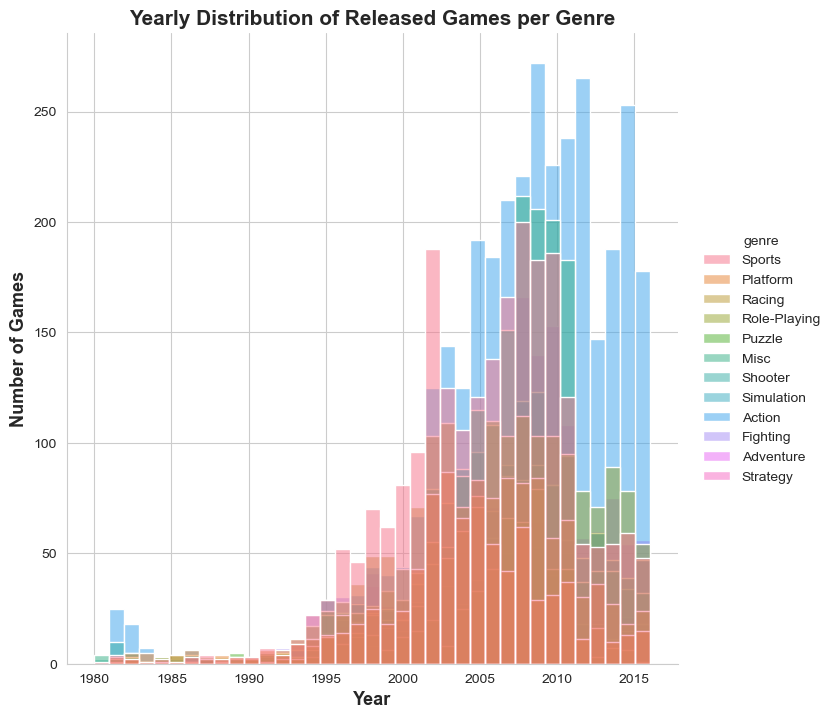

In [29]:
# Plot a histogram to show the distribtuion of game counts per genre
sns_displot(data = data, x = 'year_of_release', hue = 'genre', height = 7,            
            title = 'Yearly Distribution of Released Games per Genre', 
            xlabel = 'Year', ylabel = 'Number of Games')

**Intermediate conclusion**

From the histogram, the only visible change of the `genre` preference is at 2002, the dominant `genre` changed from `sports` to `action`. Compared to `platform`, the `genre` factor has even less impact on the values of `year_of_release` and thus will not be used to fill the missing values in `year_of_release`.

**Conclusion** 

Out of the three variables, `name` will be used to fill the missiing values in `year_of_release`. The missing values will be filled by using the median year from other rows with same game `name` but different platforms. The median is chosen to avoid possible outliers when the old games were remade and released into other `platform`.

In [30]:
# Fill in the missing values in year_of_release based on the median year of the same game names
data['year_of_release'] = data['year_of_release'].fillna(
    data.groupby('name')['year_of_release'].transform('median').round()
)

# Check how many missing values are remained in year_of_release
calc_na('year_of_release')

The number of missing values in year_of_release: 146
The percentage of missing values in year_of_release: 0.87%


There are still 146 missing values cannot be filled. Since `year_of_release` is a critical column in this project, the remaining missing values will be left unfilled.

In [31]:
# Check the unique list of year_of_release
print(data['year_of_release'].unique())

# Check the info
data.info()

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000. 1995. 1991. 1981. 1987. 1980.
 1983.   nan]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  platform_count   16713 non-null  int64  
dtypes: float6

[Back to Contents](#back)

**`critic_score` and `user_score`** <a id='critic_and_user'></a>

In [32]:
# Find the number and percentage of mising values
calc_na('critic_score')

The number of missing values in critic_score: 8576
The percentage of missing values in critic_score: 51.31%


51.31% of missing values! Let's carry out some investigations.

In [33]:
# Have a look at the rows with missing values in critic_score
critic_na = data.query('critic_score.isna()')

critic_na.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_count
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,2
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,2
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,1
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,1
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,1
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,2
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,1
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,1
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,2


Surprisingly we found that the rows with missing values in `critic_score` also have missing values in `user_score` and `rating`. The three variables may share some common patterns in their distributions of missing values. We will first check on the distribution of `critic_na data`.

In [34]:
# Compare the distributions of numerical data of original data and critic_score na data
check_na_distr_num('critic_score')

original data


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16567.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,7590.000000
mean,2006.490433,0.263302,0.145045,0.077625,0.047343,68.967679,7.125046
std,5.862690,0.813565,0.503359,0.308871,0.186742,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


--------------------------------------------------------------------------------
critic_score_na_data


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,8492.000000,8576.000000,8576.000000,8576.000000,8576.000000,0.0,573.000000
mean,2005.827602,0.178215,0.085017,0.099065,0.023535,NaN,6.422339
std,7.036738,0.715940,0.321036,0.343974,0.088748,NaN,1.959321
min,1980.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,2001.000000,0.000000,0.000000,0.000000,0.000000,NaN,5.300000
50%,2008.000000,0.020000,0.000000,0.000000,0.000000,NaN,7.000000
75%,2011.000000,0.140000,0.050000,0.060000,0.020000,NaN,7.900000
max,2016.000000,29.080000,10.950000,10.220000,2.740000,NaN,9.700000


In [35]:
# Compare the distributions of categorical data of original data and critic_na data
check_na_distr_cat('critic_score')

,platform,distribution in original data,distribution in critic_score_na data
0,DS,0.128702,0.167211
1,PS,0.071621,0.116255
2,PS2,0.129301,0.100630
3,PSP,0.072339,0.087104
4,Wii,0.078980,0.085704
5,PS3,0.079639,0.059585
6,GBA,0.049183,0.044776
7,3DS,0.031114,0.041045
8,X360,0.075510,0.040345
9,N64,0.019087,0.037197


--------------------------------------------------------------------------------


,genre,distribution in original data,distribution in critic_score_na data
0,Action,0.201580,0.172458
1,Misc,0.104709,0.143074
2,Sports,0.140489,0.134562
3,Adventure,0.077963,0.114272
4,Role-Playing,0.089631,0.088736
5,Simulation,0.052235,0.060751
6,Racing,0.074732,0.059118
7,Fighting,0.050799,0.051306
8,Platform,0.053132,0.045592
9,Strategy,0.040866,0.044426


--------------------------------------------------------------------------------


,rating,distribution in original data,distribution in critic_score_na data
0,E,0.401347,0.624802
1,T,0.297618,0.169393
2,E10+,0.142728,0.159367
3,M,0.157101,0.042216
4,EC,0.000804,0.004222
5,AO,0.000101,NaN
6,RP,0.000302,NaN


--------------------------------------------------------------------------------


For the numerical columns, the overall distributions of data for the `original data` and the `critic_score_na data` are highly similar, except the `na_sales` and the `eu_sales`. Compared to the `original data`, the `critic_score_na_data` has a higher portion of missing values for lower sales amount in Europe and North America. A low sales infers that the game is not popular. Since professionals only review on popular games to satisfy their audiences, unpopular games are less likely to get reviewed.

In the categorical columns, the distributions for both datasets show similar patterns with one exception, the `E` `rating` has a higher portion in `critic_score_na data`.The `E` stands for `everyone`, the game with this rating has no inappropriate content like images that upset children or inaccurate information that might lead children into dangerous behaviour. Usually, the content of `E` `rating` games can be 'dull and repetitive'. As a result, professionals are reluctant to spend time and effort to review these games.

Besides that, the culture of writing and reading game reviews emerged with the increasing popularity of the internet in the 2000s, thus the game in the `1980s` or `1990s` are not likely to have a `critic_score`. However, the above tables do not provide sufficient evidence to support this claim as the number of games released in `1980` and `1990` is much less than `1990` and `2000`. We can have a check on this.

In [36]:
# Find the max and min values of year_of_release to decide the decade groups
print('The maximum year_of_release is', data['year_of_release'].max())
print('The minimum year_of_release is', data['year_of_release'].min())

The maximum year_of_release is 2016.0
The minimum year_of_release is 1980.0


In [37]:
# Create a function to assign decade
def assign_decade(year):
    if pd.isna(year):
        return np.nan
    if 1980 <= year < 1990:
        return '1980s'
    elif 1990 <= year < 2000:
        return '1990s'
    elif 2000 <= year < 2010:
        return '2000s'
    else:
        return '2010s'

In [38]:
# Assign the decade value in a new column
data['decade'] = data['year_of_release'].apply(assign_decade)

# Check if the assignment has been made
data[['year_of_release', 'decade']].head()

,year_of_release,decade
0,2006.0,2000s
1,1985.0,1980s
2,2008.0,2000s
3,2009.0,2000s
4,1996.0,1990s


In [39]:
# Create a table calculating number of games getting reviews in each decade
decade_critic = data.pivot_table(
    index = 'decade',
    values = ['name', 'critic_score'],
    aggfunc = 'count'
).reset_index()

# Look at the table
decade_critic.head()

,decade,critic_score,name
0,1980s,2,205
1,1990s,94,1771
2,2000s,5639,9270
3,2010s,2340,5321


In [40]:
# Rename the columns
decade_critic.columns = ['decade', 'total_reviewed_games', 'total_games']

In [41]:
# Calculate the percentage of reviewed games
decade_critic['reviewed_games_percentage'] = decade_critic['total_reviewed_games'] / decade_critic['total_games']

# Display the table
decade_critic

,decade,total_reviewed_games,total_games,reviewed_games_percentage
0,1980s,2,205,0.009756
1,1990s,94,1771,0.053077
2,2000s,5639,9270,0.608306
3,2010s,2340,5321,0.439767


Indeed, the games in `1980s` and `1990s` have low review rates. The missingness of `critic_score` depend on `year_of_release`.

On the other hand, it is suspected that the missing values in `user_score` also show similar patterns. Let's check on the `user_score` column.

In [42]:
# Find the number and percentage of mising values
calc_na('user_score')

The number of missing values in user_score: 9123
The percentage of missing values in user_score: 54.59%


In [43]:
# Compare the distributions of numerical data of original data and missing values data
check_na_distr_num('user_score')

original data


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16567.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,7590.000000
mean,2006.490433,0.263302,0.145045,0.077625,0.047343,68.967679,7.125046
std,5.862690,0.813565,0.503359,0.308871,0.186742,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


--------------------------------------------------------------------------------
user_score_na_data


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,9027.000000,9123.000000,9123.000000,9123.000000,9123.000000,1120.000000,0.0
mean,2005.498615,0.169695,0.078614,0.093043,0.020682,60.934821,NaN
std,6.748552,0.692861,0.306728,0.334381,0.081954,11.383565,NaN
min,1980.000000,0.000000,0.000000,0.000000,0.000000,23.000000,NaN
25%,2001.000000,0.000000,0.000000,0.000000,0.000000,54.000000,NaN
50%,2007.000000,0.030000,0.000000,0.000000,0.000000,62.000000,NaN
75%,2010.000000,0.130000,0.050000,0.060000,0.010000,69.000000,NaN
max,2016.000000,29.080000,10.950000,10.220000,2.740000,90.000000,NaN


In [44]:
# Compare the distributions of categorical data of original data and missing values data
check_na_distr_cat('user_score')

,platform,distribution in original data,distribution in user_score_na data
0,DS,0.128702,0.179217
1,PS,0.071621,0.113450
2,PS2,0.129301,0.100844
3,PSP,0.072339,0.086375
4,Wii,0.078980,0.083306
5,GBA,0.049183,0.062151
6,PS3,0.079639,0.049764
7,3DS,0.031114,0.037926
8,N64,0.019087,0.034967
9,X360,0.075510,0.032445


--------------------------------------------------------------------------------


,genre,distribution in original data,distribution in user_score_na data
0,Action,0.201580,0.168695
1,Misc,0.104709,0.143703
2,Sports,0.140489,0.136468
3,Adventure,0.077963,0.109942
4,Role-Playing,0.089631,0.082758
5,Racing,0.074732,0.066645
6,Simulation,0.052235,0.057985
7,Platform,0.053132,0.050422
8,Puzzle,0.034704,0.049545
9,Fighting,0.050799,0.049326


--------------------------------------------------------------------------------


,rating,distribution in original data,distribution in user_score_na data
0,E,0.401347,0.660532
1,T,0.297618,0.163599
2,E10+,0.142728,0.154192
3,M,0.157101,0.018405
4,EC,0.000804,0.002863
5,RP,0.000302,0.000409
6,AO,0.000101,NaN


--------------------------------------------------------------------------------


The distribution of the data for the `user_score_na data` is closely resembles that of the `critic_score_na data`. We will addressed the missing values in `critic_score` and `user_score` in the same manner.

Since the missingness depends on the `sales`, `rating` and `year_of_release`, the data are missing at random (**MAR**). However, this does not imply that the values of `critic_score` and `user_score` depends on `sales`, `rating` and `year_of_release`. Now let's try to find the dependent factors which have impact on the values of `critic_score` and `user_score`.

In [45]:
# Have a look at the row with missing values in critic_score
data.query('critic_score.isna()').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_count,decade
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,2,1980s
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1,1990s
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,2,1980s
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,1,1980s
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,1,2000s
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,1,1990s
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,2,1990s
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,1,2000s
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,1,1980s
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,2,1980s


By looking at some of these rows with missing values in `critic_score` and `user_score`, three possible dependent factors will be considered:
- `sales`: If the game has a high `score`, the `sales` should be good. 
- `genre`: It is suspected that some `genre` may have extreme high or low score due to the content. For example, `action` game is always the dominant `genre` in market except in the `1990s`, it is possible that `action` game will have a high `critic_score` due to this preference.
- `rating`: Same as `genre`, games of different `rating` will have different content, a `E` rating game can be boring due to the restricted content and has a low `score`.

To distinguish which of these factors is the deciding factor of `score` values, we will calculate the correlation coefficients for the numerical columns and comparing the medians and means for the categorical factors.

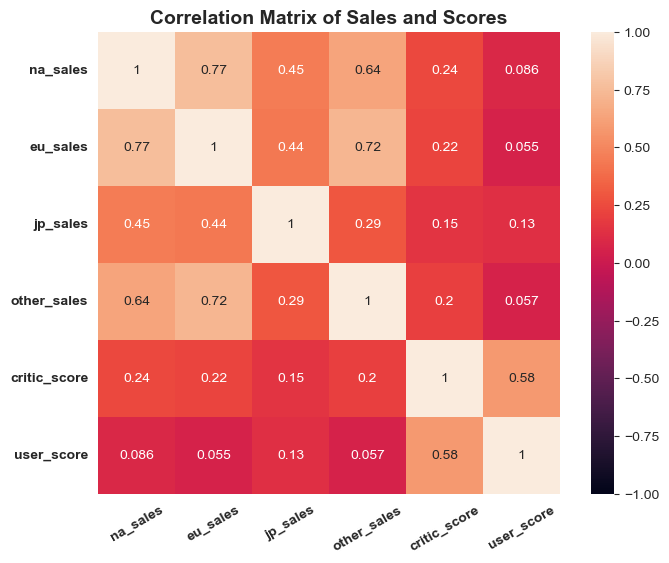

In [46]:
# Calculate the correlation matrix for the numerical variables
num_var = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']

plt.figure(figsize = (8,6))

sns.heatmap(data[num_var].corr(), vmin = -1, vmax = 1, square = True, annot = True)

plt.title('Correlation Matrix of Sales and Scores', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 30, fontweight = 'bold')
plt.yticks(rotation = 0, fontweight = 'bold')

plt.show()

Statistically, with almost half of the values are missing in `critic_score`, the correlation coefficient is not a robust indicator but we will take it as a reference. 

**Intermediate conclusion**

From the last two rows of correlation matrix, it can be seen that both `critic_score` and `user_score` have weak connections with `sales`. Thus, the missing values cannot be filled based on the `sales`.

In [47]:
# Compare the mean and median scores across the categories of genre
group_mean_median(group = 'genre', check_list = ['critic_score', 'user_score'])

critic_score


,genre,count,mean,median
0,Action,1890,66.629101,68.0
1,Sports,1194,71.968174,75.0
2,Shooter,944,70.181144,73.0
3,Racing,742,67.963612,69.0
4,Role-Playing,737,72.652646,74.0
5,Misc,523,66.619503,69.0
6,Platform,497,68.058350,69.0
7,Fighting,409,69.217604,72.0
8,Simulation,352,68.619318,70.0
9,Adventure,323,65.331269,66.0


--------------------------------------------------
user_score


,genre,count,mean,median
0,Action,1830,7.054044,7.4
1,Sports,1103,6.961197,7.4
2,Shooter,924,7.041883,7.4
3,Role-Playing,743,7.619515,7.8
4,Racing,641,7.036193,7.4
5,Misc,439,6.819362,7.1
6,Platform,428,7.301402,7.7
7,Fighting,399,7.302506,7.6
8,Simulation,344,7.134593,7.5
9,Strategy,311,7.295177,7.8


--------------------------------------------------


**Intermediate conclusion**

The mean and median `score` across all the categories of `genre` do not vary substantially, therefore `genre` is not the dependent factor.

In [48]:
# Compare the mean and median scores across the categories of rating
group_mean_median(group = 'rating', check_list = ['critic_score', 'user_score'])

critic_score


,rating,count,mean,median
0,E,2809,68.493058,70.0
1,T,2640,68.828409,71.0
2,M,1483,71.797033,74.0
3,E10+,1118,66.759392,68.0
4,RP,3,62.000000,63.0
5,AO,1,93.000000,93.0
6,EC,0,NaN,NaN


--------------------------------------------------
user_score


,rating,count,mean,median
0,T,2561,7.286724,7.6
1,E,2378,7.053785,7.5
2,M,1518,7.159881,7.5
3,E10+,1043,6.855225,7.1
4,RP,2,5.300000,5.3
5,AO,1,8.600000,8.6
6,EC,1,7.000000,7.0


--------------------------------------------------


**Intermediate conclusion**

The mean and median `score` in the categories with top four counts of games do not vary significantly. Therefore, `rating` is also not a dependent factor for `score` values.

**Conclusion**

All of the suspected factors namely `sales`, `genre` and `rating` show no impact on the values of `score`.

Nevertheless, It is reasonable to assume that the `critic_score` and `user_score` of a game should be very close, regardless of the platform. From the correlation matrix, a correlation coefficient of 0.58 indicates that `critic_score` and `user_score` has a moderate to strong direct connection. Therefore, to fill the missing values without introducing a significant bias, 

**the missing values in `critic_score` will be filled with**
1. the median `critic_score` from the same `game` but different `platform`
2. the `user_score` from the same `game` and same `platform`
3. the median `user_score` from the same `game` but different `platform`

**The missing values in `user_score` will be filled with**
1. the median `user_score` from the same `game` but different `platform`
2. the `credit_score` from the same `game` and same `platform`
3. the median `credit_score` from the same `game` but different `platform`

To achieve a better accuracy, we will fill the missing values in the order above. The median is chosen to avoid possible outliers when some critics or users gave extreme low or high scores. Furthermore, since the missing values in the two columns will be filled based on each other, two additional columns will be created to ensure that missing values are not filled based on the 'fixed missing values'.

In [49]:
# Create a new column for critic_score and user_score
data['clean_critic_score'] = data['critic_score']
data['clean_user_score'] = data['user_score']

# Fill the missing values with the random samples critic_score from the same game but different platforms
data.loc[data['clean_critic_score'].isna(), 'clean_critic_score'] = (
    data.groupby('name')['critic_score'].transform('median').round()
)

# Fill the missing values with the median user_score from the same game but different platforms
data.loc[data['clean_user_score'].isna(), 'clean_user_score'] = (
    data.groupby('name')['user_score'].transform('median').round()
)

# Check the number of missing values remained
calc_na('clean_critic_score')
print('-'*80)
calc_na('clean_user_score')

The number of missing values in clean_critic_score: 7615
The percentage of missing values in clean_critic_score: 45.56%
--------------------------------------------------------------------------------
The number of missing values in clean_user_score: 8024
The percentage of missing values in clean_user_score: 48.01%


In [50]:
# Fill the missing values with the user_score from the same game and same platform
# Note: Critic_score has a maximum of 100 and user_score has a maximum of 10
data.loc[data['clean_critic_score'].isna(), 'clean_critic_score']  = data['user_score'] * 10

# Fill the missing values with the critic_score from the same game and same platform
data.loc[data['clean_user_score'].isna(), 'clean_user_score'] = data['critic_score'] / 10

# Check the number of missing values remained
calc_na('clean_critic_score')
print('-'*80)
calc_na('clean_user_score')

The number of missing values in clean_critic_score: 7379
The percentage of missing values in clean_critic_score: 44.15%
--------------------------------------------------------------------------------
The number of missing values in clean_user_score: 7358
The percentage of missing values in clean_user_score: 44.03%


In [51]:
# Fill in the missing values with the median user_score from the same `game` but different platforms
data.loc[data['clean_critic_score'].isna(), 'clean_critic_score'] = (
    data.groupby('name')['user_score'].transform(lambda x: round(x.median(), 1) * 10)
)

# Fill in the missing values with the median critic_score from the same `game` but different platforms
data.loc[data['clean_user_score'].isna(), 'clean_user_score'] = (
    data.groupby('name')['critic_score'].transform(lambda x: round(x.median() / 10, 1))
)

# Check the number of missing values remained
calc_na('clean_critic_score')
print('-'*60)
calc_na('clean_user_score')

The number of missing values in clean_critic_score: 7279
The percentage of missing values in clean_critic_score: 43.55%
------------------------------------------------------------
The number of missing values in clean_user_score: 7279
The percentage of missing values in clean_user_score: 43.55%


In [52]:
# Check the unique values in critic_score
print(data['clean_critic_score'].unique())
print('-'*60)
print(data['clean_user_score'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 42. 67. 81. 66. 56.
 43. 79. 70. 59. 64. 75. 60. 63. 69. 50. 25. 44. 55. 48. 57. 29. 47. 65.
 54. 20. 53. 37. 52. 38. 33. 30. 32. 45. 51. 40. 46. 39. 34.  0. 35. 41.
 36. 28. 31. 11. 27. 26. 13. 19. 14. 23. 24. 21. 17. 22.  9.  3.  2. 12.
  6. 18.]
------------------------------------------------------------
[ 8.   nan  8.3  8.5  6.6  8.4  8.6  7.7  6.3  7.4  8.2  9.   7.9  8.1
  8.7  7.1  3.4  5.3  4.8  3.2  8.9  6.4  7.8  7.5  2.6  7.2  9.2  7.
  7.3  4.3  7.6  5.7  5.   9.1  6.5  8.8  6.9  9.4  6.8  6.1  6.7  5.4
  4.   4.9  4.5  9.3  6.2  4.2  6.   3.7  4.1  5.8  5.6  5.5  4.4  4.6
  5.9  3.9  3.1  2.9  5.2  3.3  2.   4.7  5.1  3.5  2.5  1.9  3.   2.7
  2.2  9.5  2.1  3.6 10.   2.8  1.8  3.8  0.   1.6  9.6  2.4  1.7  1.1
  0.3  1.   1.5  0.7  1.2  2.3  0.5  1.3  0.2  0.6  1.4  0.9  9.7]


Looks good. However, there are still 7279 rows containing missing values in these two columns. With this large amount of missing data, it is unwise to fill the missing values with the mean or median of the column itself as they will result in loss of variation in data and skew the data distribution, potentially yielding biased results or conclusions. 

We shall leave these missing values unfilled.

[Back to Contents](#back)

**`rating`** <a id='rating'></a>

In previous section, we found that `rating` may also have similar distribution of data. We will investigate into this.

In [53]:
# Find the number and percentage of mising values
calc_na('rating')

The number of missing values in rating: 6764
The percentage of missing values in rating: 40.47%


In [54]:
# Compare the distributions of numerical data of original data and missing values data
check_na_distr_num('rating')

original data


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16567.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,7590.000000
mean,2006.490433,0.263302,0.145045,0.077625,0.047343,68.967679,7.125046
std,5.862690,0.813565,0.503359,0.308871,0.186742,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


--------------------------------------------------------------------------------
rating_na_data


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,6699.000000,6764.000000,6764.000000,6764.000000,6764.000000,83.000000,86.000000
mean,2004.893417,0.183424,0.090671,0.124472,0.022324,68.614458,6.965116
std,7.484371,0.796083,0.348012,0.383076,0.092140,12.633513,1.432954
min,1980.000000,0.000000,0.000000,0.000000,0.000000,31.000000,3.100000
25%,1999.000000,0.000000,0.000000,0.000000,0.000000,62.000000,6.100000
50%,2007.000000,0.000000,0.000000,0.020000,0.000000,70.000000,7.350000
75%,2011.000000,0.120000,0.050000,0.100000,0.010000,77.500000,8.100000
max,2016.000000,29.080000,10.950000,10.220000,2.740000,93.000000,9.200000


In [55]:
# Compare the distributions of numerical data of original data and missing values data
check_na_distr_cat('rating')

,platform,distribution in original data,distribution in rating_na data
0,PS,0.071621,0.146215
1,DS,0.128702,0.129805
2,PS2,0.129301,0.100532
3,PSP,0.072339,0.098315
4,PS3,0.079639,0.056032
5,N64,0.019087,0.047161
6,Wii,0.078980,0.047014
7,GBA,0.049183,0.044352
8,3DS,0.031114,0.043170
9,PSV,0.025728,0.041248


--------------------------------------------------------------------------------


,genre,distribution in original data,distribution in rating_na data
0,Action,0.201580,0.174601
1,Misc,0.104709,0.128326
2,Adventure,0.077963,0.126700
3,Sports,0.140489,0.124039
4,Role-Playing,0.089631,0.106594
5,Fighting,0.050799,0.060763
6,Racing,0.074732,0.055736
7,Strategy,0.040866,0.050857
8,Platform,0.053132,0.047161
9,Simulation,0.052235,0.045092


--------------------------------------------------------------------------------


For both the numerical and categorical columns, the distribution of data for the `rating_na data` is indeed similar to that of `critic_score_na data` and `user_score_na data`. Notably, a larger proportion of missing values tends to be associated with lower sales amounts in Europe and North America. Also, there is a higher portion of `rating` data are missing in `PC` `platform` category. As a result, we conclude that the data are missing at random (**MAR**).

Three possible dependent factors will be considered:
- `name`: As what we have discussed in addressing the missing values of `year_or_release`, it is clear that the `rating` data must be dependent on the `name` variable.
- `genre`: Considering `rating` represents the classification of game `content`, the values of `rating` could depend on `genre` which is also content-related.
- `platform`: Some platforms are designed to target certain age group, therefore `platform` is also content-related.
We will check whether `genre` and `platform` have effect on the values of `rating` first before filling the missing values.

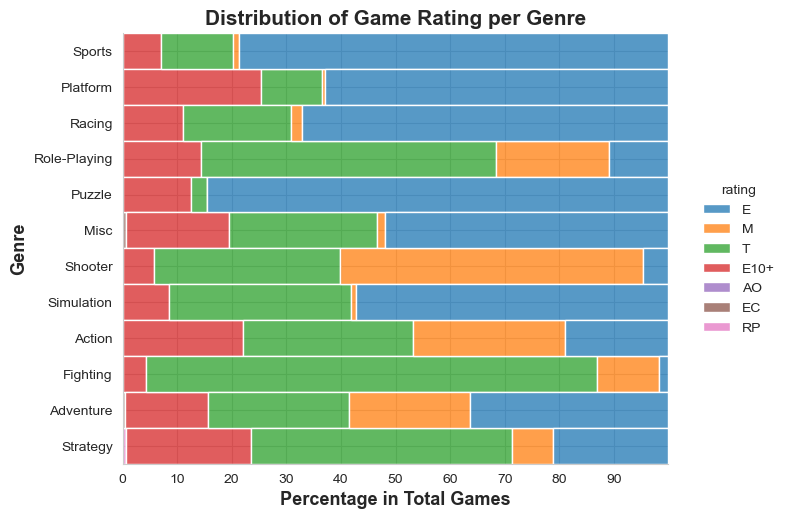

In [56]:
# For each genre, plot a filled bar chart to show the distribtuion of Game Rating
sns_displot(data = data, y = 'genre', hue = 'rating',
            aspect = 1.4, multiple = 'fill',
            title = 'Distribution of Game Rating per Genre',
            xlabel = 'Percentage in Total Games', ylabel = 'Genre')

**Intermediate conclusion**

From the bar chart, it is evident that each `genre` tends to be associated with certain dominant `rating` values. For instance, `sport` games predominantly feature `E` as `rating`, while `action` games have four main `rating` which are `T`, `M`, `E10+` and `E`. However, similar to the `year_of_release` variable, we recognise that `rating` plays a crucial role in conducting  accurate analyses and drawing meaningful conclusion. The `genre` factor does not provide detailed information for us to fill the missing values of `rating` accurately.

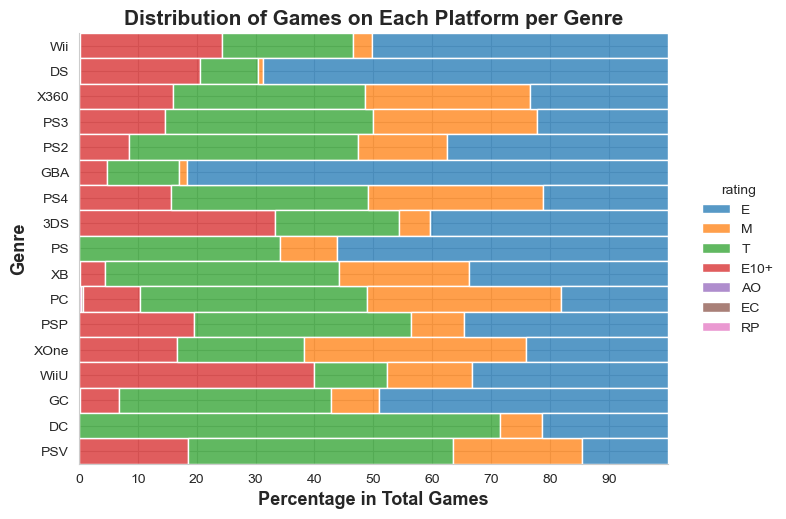

In [57]:
# For each genre, plot a filled bar chart to show the distribtuion of Game Rating
sns_displot(data = data, y = 'platform', hue = 'rating',
            aspect = 1.4, multiple = 'fill',
            title = 'Distribution of Games on Each Platform per Genre',
            xlabel = 'Percentage in Total Games', ylabel = 'Genre')

**Intermediate conclusion**

As expected, all the platforms have their primary focus of game content, thus the games from each platform have certain `rating` values. For example, most of the games from `DS` `platform` are rated as `E`. Nevertheless, even though the `platform` factor provides some insight, it may still not be adequate for imputing the missing values in `rating` based on `platform` without a precise value.

On the other hand, some 'old' platforms are not shown in the chart since ESRB `rating` system started from 1994. This provides evidence that the missingness (but not the values) depends on the `year_of_release`

In [58]:
# Have a look at the game platforms which do not have any ESRB rating value
data.groupby('platform')['rating'].count().sort_values()

platform
2600       0
PCFX       0
SCD        0
NG         0
NES        0
N64        0
GG         0
SAT        0
GEN        0
TG16       0
GB         0
WS         0
3DO        0
SNES       0
DC        14
WiiU     105
PSV      151
XOne     186
PS       208
3DS      228
PS4      255
GC       469
GBA      522
PSP      544
XB       733
PC       774
PS3      952
Wii     1002
X360    1052
DS      1273
PS2     1481
Name: rating, dtype: int64

**Conclusion**

The `name` is the only dependent factor which will be used to impute the missiing values in `genre`.  We will employ the same methodology as used for 'year_of_release' to fill in these missing values.

In [59]:
# Fill the mising values with the mode of rating from the same game but different platform
data.loc[data['rating'].isna(), 'rating'] = (
    data.groupby('name')['rating'].transform(lambda rating: rating.mode())
)

# Calculate the number of remaining missing values
calc_na('rating')

The number of missing values in rating: 6764
The percentage of missing values in rating: 40.47%


The remaining missing values will not be filled to ensure that we have accurate analysis result and conclusion.

In [60]:
# Check the list of unique values
print(data['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'AO' 'EC' 'RP']


In [61]:
# Final check on the missing values
data.isna().sum().sort_values(ascending = False)

user_score            9123
critic_score          8576
clean_critic_score    7279
clean_user_score      7279
rating                6764
year_of_release        146
decade                 146
name                     0
platform                 0
genre                    0
na_sales                 0
eu_sales                 0
jp_sales                 0
other_sales              0
platform_count           0
dtype: int64

In [62]:
# Final check on the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                16713 non-null  object 
 1   platform            16713 non-null  object 
 2   year_of_release     16567 non-null  float64
 3   genre               16713 non-null  object 
 4   na_sales            16713 non-null  float64
 5   eu_sales            16713 non-null  float64
 6   jp_sales            16713 non-null  float64
 7   other_sales         16713 non-null  float64
 8   critic_score        8137 non-null   float64
 9   user_score          7590 non-null   float64
 10  rating              9949 non-null   object 
 11  platform_count      16713 non-null  int64  
 12  decade              16567 non-null  object 
 13  clean_critic_score  9434 non-null   float64
 14  clean_user_score    9434 non-null   float64
dtypes: float64(9), int64(1), object(5)
memory usage: 1.9+

Before we start analysing the data, a `total_sales` column will be created to assist the upcoming analysis.

In [63]:
# Create a total_sales column
sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data['global_sales'] = data[sales].sum(axis = 1)

# Have a look at these columns of sales
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].head()

,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,41.36,28.96,3.77,8.45,82.54
1,29.08,3.58,6.81,0.77,40.24
2,15.68,12.76,3.79,3.29,35.52
3,15.61,10.93,3.28,2.95,32.77
4,11.27,8.89,10.22,1.00,31.38


[Back to Contents](#back)

## 4. Exploratory Data Analysis (EDA) <a id='eda'></a>

---

The following functions are created to automate the tasks in EDA stage.

In [64]:
def sns_barplot(data, x, y, figsize, title, xlabel, ylabel, agg = None,
                sort = False, ascending = False, horizontal = False, bar_label = False):
    """
    This function plot a bar chart to compare 
    the information of a column (y) based on other column (x)
    """
    
    # Create an aggregated data
    if agg is not None:
        data = data.groupby(x)[y].agg(agg).reset_index()   
    
    # To decide if the bars are sorted in ascending or descending order
    if sort:
        data.sort_values(y, ascending = ascending, inplace = True)
    
    # Set up figure
    sns.set_style('whitegrid')
    plt.figure(figsize = (figsize[0], figsize[1]))
    
    # Plot vertical or horizontal bars
    if not horizontal:
        ax = sns.barplot(data = data, x = x, y = y, errorbar = None)
    else:
        ax = sns.barplot(data = data, x = y, y = x, errorbar = None)
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12, fontweight='bold')
    plt.ylabel(ylabel, fontsize=12, fontweight='bold')
    
    # To decided if the bar labels are shown
    if bar_label == True:
        for i in ax.containers:
            ax.bar_label(i,)
    
    plt.show()

In [65]:
def plot_sales_heatmap(data, figsize):
    """
    This function plot a heatmap to show how sales varies across the years
    """
    
    # Find the yearly sales    
    data = data.pivot_table(
        index = 'platform',
        columns = 'year_of_release',
        values = 'global_sales',
        aggfunc = 'sum'
    )
    
    # Plot the heatmap
    plt.figure(figsize = (figsize[0], figsize[1]))

    sns.heatmap(data, cmap = 'PuRd', square = True, linewidth = 1)

    plt.title('Distribution of Sales (million USD) by Years', fontsize = 14, fontweight = 'bold')
    plt.xlabel('Year', fontsize = 12, fontweight = 'bold')
    plt.ylabel('Platform', fontsize = 12, fontweight = 'bold')
    plt.xticks(rotation = 45, fontweight = 'bold')
    plt.yticks(rotation = 0, fontweight = 'bold')

    plt.show()

In [66]:
def top_regional_platform_pie(data, compare_column):
    """
    This function creates three pie charts to compare the regional sales based on a factor
    """
    na_data = data.groupby(compare_column)['na_sales'].sum().sort_values().tail()
    eu_data = data.groupby(compare_column)['eu_sales'].sum().sort_values().tail()
    jp_data = data.groupby(compare_column)['jp_sales'].sum().sort_values().tail()
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (13, 3))
    fig.suptitle(f'Top {compare_column.capitalize()} in Sales per Region', 
                 fontsize = 15, fontweight = 'bold', y = 1.04)

    ax1.pie(na_data.values, labels = na_data.index, autopct = '%1.1f%%',
            startangle = 90, shadow = True, explode = (0, 0, 0, 0, 0.1))
    ax1.axis('equal')

    ax2.pie(eu_data.values, labels = eu_data.index, autopct = '%1.1f%%',
            startangle = 90, shadow = True, explode = (0, 0, 0, 0, 0.1))
    ax2.axis('equal')

    ax3.pie(jp_data.values, labels = jp_data.index, autopct = '%1.1f%%',
            startangle = 90, shadow = True, explode = (0, 0, 0, 0, 0.1))
    ax3.axis('equal')

    ax1.set_title(f'NA Top {compare_column.capitalize()}', fontsize = 12, fontweight = 'bold')
    ax2.set_title(f'EU Top {compare_column.capitalize()}', fontsize = 12, fontweight = 'bold')
    ax3.set_title(f'JP Top {compare_column.capitalize()}', fontsize = 12, fontweight = 'bold')

    plt.show()

[Back to Contents](#back)

---

### Number of Release Games per Year <a id='number_of_games'></a>

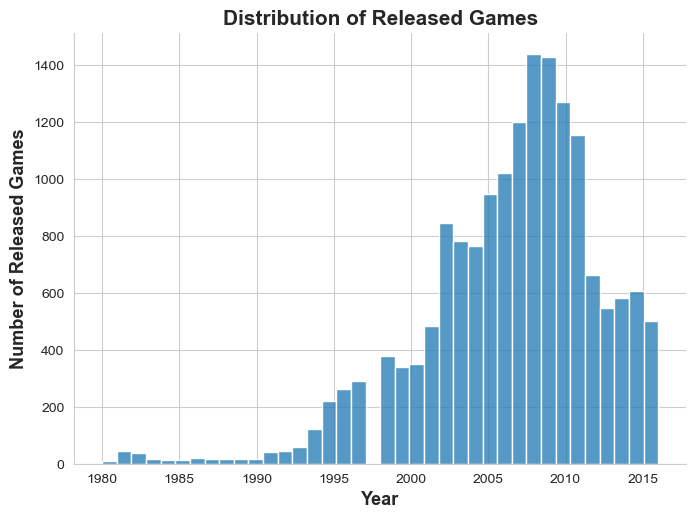

In [67]:
# Plot a histogram to show the distribtuion of game counts per genre
sns_displot(data = data, x = 'year_of_release', aspect = 1.4,
            title = 'Distribution of Released Games',
            xlabel = 'Year', ylabel = 'Number of Released Games')

**Intermediate conclusion**
- There are little of games were released before 1990.
- The number of released games increased gradually from 1990 to 2000.
- In the period of 2000 to 2011, the number of games increased sharply and reach a peak at 2008.
- From 2012, the number of games dropped significantly and maintained at about 600 games every year.

[Back to Contents](#back)

### Overall Global Sales per Platform <a id='overall_global_sales'></a>

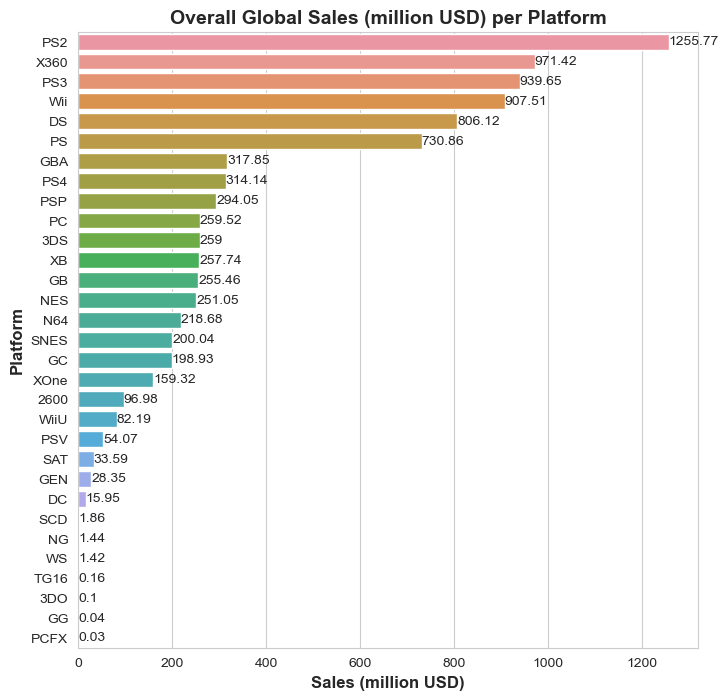

In [68]:
# Plot a bar chart to show the overall global sales per platform
sns_barplot(data = data, x = 'platform', y = 'global_sales', agg = 'sum', figsize = (8, 8),
            title = 'Overall Global Sales (million USD) per Platform', 
            xlabel = 'Sales (million USD)', ylabel = 'Platform',
            sort = True, horizontal = True, bar_label = True)

**Intermediate conclusion**

The bar chart above clearly illustrates that over the past 37 years, 'PS2,' 'X360,' 'PS3,' 'Wii,' 'DS,' and 'PS' have significantly outperformed other platforms in terms of 'global_sales,' with 'PS2' emerging as the most dominant among them.

[Back to Contents](#back)

### Emerging and Declining Platforms <a id='up_down_platform'></a>

To analyse and forecast sales for the year 2017, we will first explore these six popular `platform` and identify any noticeable pattern in how sales vary throughout the recent years.

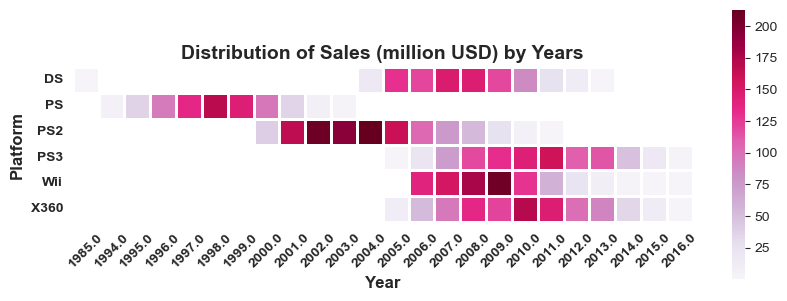

In [69]:
# Plot a sales heatmap for the six top platforms
plot_sales_heatmap(data.query('platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]'), figsize = (10, 3.5))

**Intermediate conclusion**
- The `DS`, `PS` and `PS2` platforms used to be popular but now have zero sales.
- Each of these popular 'platforms' typically had a lifespan of about ten years.
- After an initial two-year growth period, these platforms reached their peak period of popularity, which typically spanned around five years. Following this peak, they gradually faded out from the competition over the next three years.


Based on the conclusions drawn, to forecast sales for the year 2017, we will focus on the most recent five years of data. This approach allows us to identify any platforms that are either gaining popularity or fading out from competition in the last five years. Since the data in 2016 is incomplete, we will analyse the data from 2011 to 2016.

In [70]:
# Since the data in 2016 is incomplete, we will take six years of data
final_data = data.query('year_of_release >= 2011').reset_index(drop = True)

# Have a look at the final data
final_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_count,decade,clean_critic_score,clean_user_score,global_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,5,2010s,97.0,8.2,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,5,2010s,97.0,8.1,16.27
2,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,4,2010s,88.0,3.4,14.73
3,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,5,2010s,NaN,NaN,14.63
4,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,1,2010s,NaN,NaN,14.60


[Back to Contents](#back)

### Current Growth Status of Platforms <a id='platform_growth'></a>

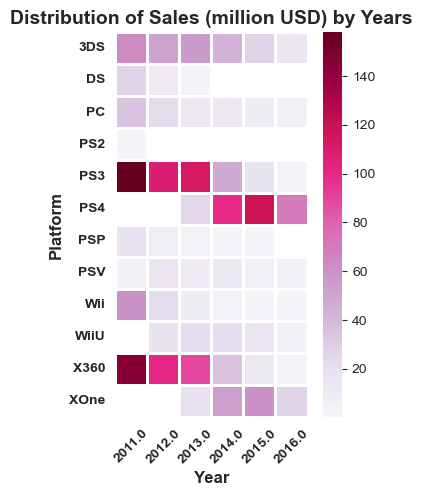

In [71]:
# Plot a sales heatmap for each platform in recent six years
plot_sales_heatmap(final_data, figsize = (4, 5))

**Intermediate conclusion**
- `PS3` and `X360` are declining in sales and it is likely that they will phase out of the market within the next two years.
- `PS4` and `Xone` are showing increasing popularity and we should priotise selling games for these platform.

We can further verify the above conclusion by calculating the compoung annual growth rate (**CAGR**) in sales.

In [72]:
cagr = final_data.pivot_table(
    index = 'platform',
    columns = 'year_of_release',
    values = 'global_sales',
    aggfunc = 'first'
)

In [73]:
# Create a function to calculat CAGR
def cagr_calc(row):
    # Find the first and last years of year_of_release
    # Year 2016 is dropped due to incomplete data
    first_year = row.first_valid_index()
    last_year = row.iloc[:-1].dropna().index[-1]
    
    # Find the sales of first year and last year
    first_year_sales = row[first_year]
    last_year_sales = row[last_year]
    
    # Number of years between first and last
    years = last_year - first_year + 1
    
    # Calculate cagr
    cagr = ((last_year_sales / first_year_sales) ** (1 / years)) - 1
    return cagr

In [74]:
# Apply the function to each row and assign it to a new column
cagr['CAGR'] = cagr.apply(cagr_calc, axis=1)

# Have a look at the result
cagr.reset_index(inplace = True)
cagr

year_of_release,platform,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,CAGR
0,3DS,12.65,9.90,14.60,11.68,3.32,7.14,-0.234739
1,DS,1.54,8.06,0.51,NaN,NaN,NaN,-0.308143
2,PC,3.88,5.14,1.67,3.05,1.28,0.65,-0.198920
3,PS2,0.13,NaN,NaN,NaN,NaN,NaN,0.000000
4,PS3,13.33,13.79,21.05,5.27,2.70,0.73,-0.273381
5,PS4,NaN,NaN,3.83,12.62,14.63,7.60,0.563202
6,PSP,0.87,0.36,0.24,0.09,0.08,NaN,-0.379539
7,PSV,1.54,1.47,0.80,1.96,0.41,0.30,-0.232546
8,Wii,10.12,6.76,3.58,2.01,0.95,0.18,-0.376970
9,WiiU,NaN,5.23,4.32,7.09,4.44,1.03,-0.040113


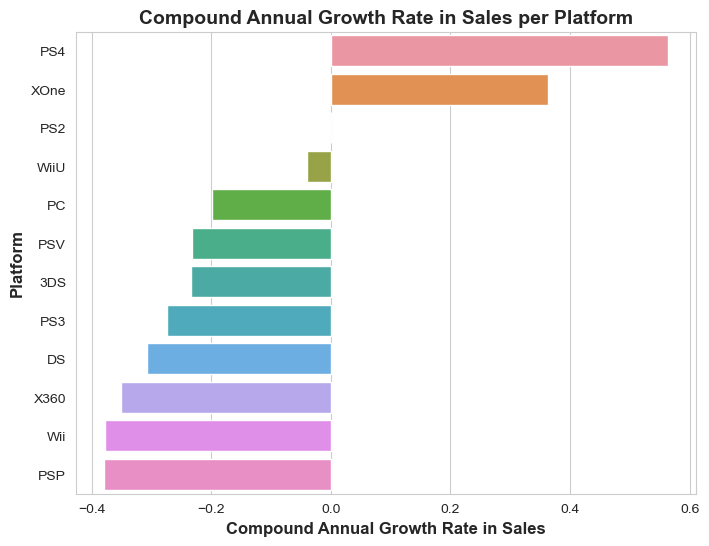

In [75]:
## Visualise the cagr of each platform
sns_barplot(data = cagr, x = 'platform', y = 'CAGR', agg = 'mean', figsize = (8, 6),
            title = 'Compound Annual Growth Rate in Sales per Platform', 
            xlabel = 'Compound Annual Growth Rate in Sales', ylabel = 'Platform',
            sort = True, horizontal = True)

**Intermediate conclusion**

Both the `PS4` and `XOne` platforms show positive compound annual growth rates (CAGR) in sales, suggesting their growth potential in the coming years.

[Back to Contents](#back)

### Yearly Game Sales per Platform <a id='game_sales_per_platform'></a>

In [76]:
plat_sales = final_data.groupby(['platform', 'year_of_release'])['global_sales'].agg(['sum', 'mean']).reset_index()

In [77]:
plat_sales.columns = ['platform', 'year', 'yearly_total_game_sales', 'yearly_avg_game_sales']

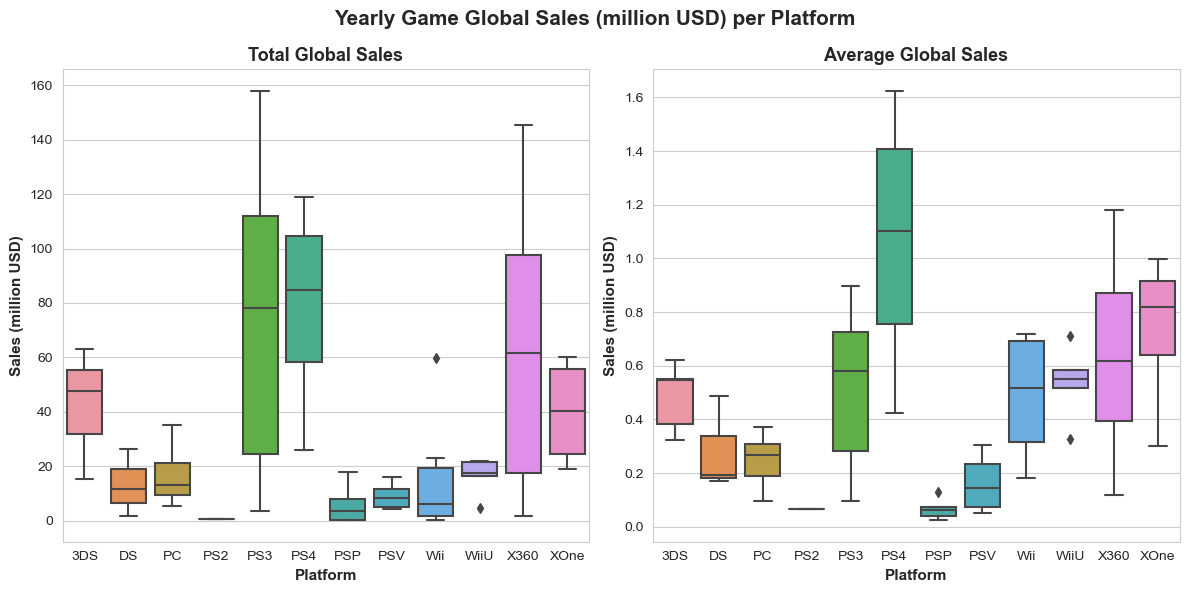

In [78]:
# Plot two boxplots to show the total and average yearly game sales per platform
sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

sns.boxplot(data = plat_sales, x = 'platform', y = 'yearly_total_game_sales', ax = ax1)
sns.boxplot(data = plat_sales, x = 'platform', y = 'yearly_avg_game_sales', ax = ax2)

fig.suptitle('Yearly Game Global Sales (million USD) per Platform', fontsize = 15, fontweight = 'bold')

ax1.set_title('Total Global Sales', fontsize = 13, fontweight = 'bold')
ax1.set_xlabel('Platform', fontsize = 11, fontweight = 'bold')
ax1.set_ylabel('Sales (million USD)', fontsize = 11, fontweight = 'bold')

ax2.set_title('Average Global Sales', fontsize = 13, fontweight = 'bold')
ax2.set_xlabel('Platform', fontsize = 11, fontweight = 'bold')
ax2.set_ylabel('Sales (million USD)', fontsize = 11, fontweight = 'bold')

plt.tight_layout()

plt.show()

**Intermediate conclusion**
- Between the years 2011 to 2016, in terms of total game sales, `PS3` and `PS4` were in the top tier, followed by the middle tier consisting of `3DS`, `X360`, `XOne`, while the rest fell into the bottom tier.
- However, in term of the average game sales, `PS4` exhibited significantly higher average sales compared to `PS3` while `XOne` outperformed `3DS` and `X360` remarkably within the middle tier.
- `Wii` and `Wiiu` did not achieve high total game sales but had average game sales on par with `PS3` and `X360`. This infers that `Wii` and `WiiU` may have had fewer games released compared to the other top platforms, but the individual game sales were strong. Therefore, we should not underestimate the potential of these two platforms.

These insights provide valuable information to decide marketing stategies for each platform.

[Back to Contents](#back)

### Effect of User and Professional Reviews on Sales <a id='scores_sales'></a>

To evaluate the impact of `critic_score` and `user_score` of sales, we will conduct the relevant analysis on `PS4` platform, as it is currently one of the most popular platform and is rising in terms of popularity and sales.

In [79]:
# Create a ps4 dataframe
ps4_data = final_data.query('platform == "PS4"')

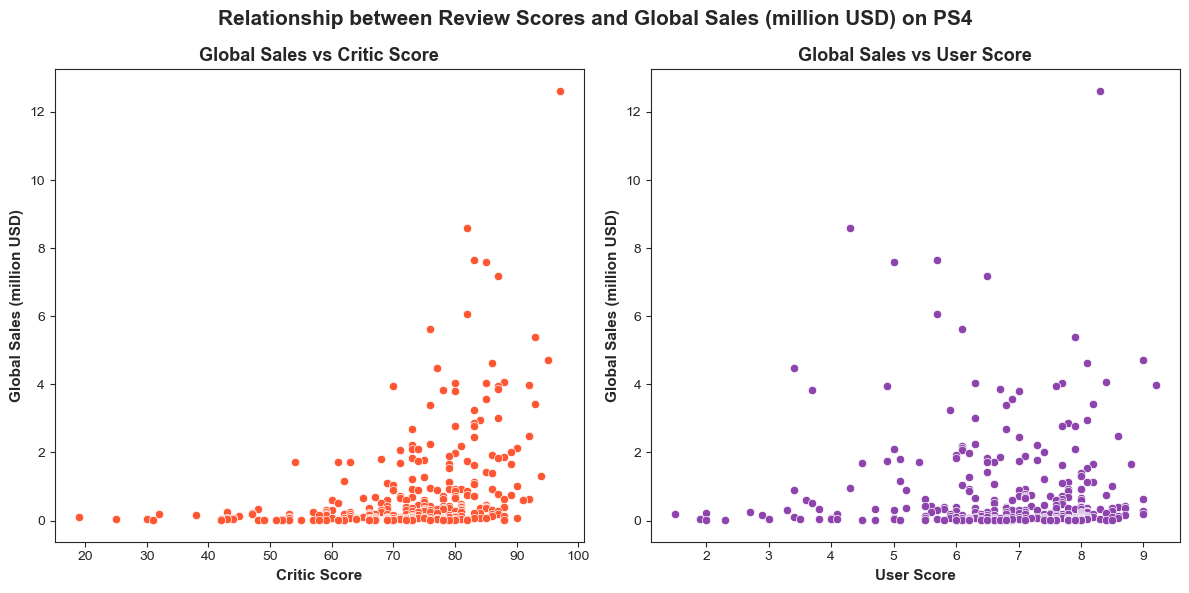

In [80]:
# Plot the scatter plots of global sales and review scores
sns.set_style('ticks')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

sns.scatterplot(data = ps4_data, x = 'clean_critic_score', y = 'global_sales', color = '#FF5733', ax = ax1)
sns.scatterplot(data = ps4_data, x = 'clean_user_score', y = 'global_sales', color = '#8e44ad', ax = ax2)

fig.suptitle('Relationship between Review Scores and Global Sales (million USD) on PS4',
             fontsize = 15, fontweight = 'bold')

ax1.set_title('Global Sales vs Critic Score', fontsize = 13, fontweight = 'bold')
ax1.set_xlabel('Critic Score', fontsize = 11, fontweight = 'bold')
ax1.set_ylabel('Global Sales (million USD)', fontsize = 11, fontweight = 'bold')

ax2.set_title('Global Sales vs User Score', fontsize = 13, fontweight = 'bold')
ax2.set_xlabel('User Score', fontsize = 11, fontweight = 'bold')
ax2.set_ylabel('Global Sales (million USD)', fontsize = 11, fontweight = 'bold')

plt.tight_layout()

plt.show()

**Intermediate conclusion**
1. For global_sales vs. critic_score:
    - Games with a `critic_score` of 50 and below do not seem to have a strong correlation with `global_sales` of `PS4`.
    - There appears to be a moderate positive relationship between `critic_score` of 50 and above and `global_sales`.
2. For global_sales vs. user_score:
    - There does not seem to be a clear linear relationship between `user_score` and `global_sales`.
    - It suggests that `user_score` may not significantly impact game sales on the `PS4` platform.

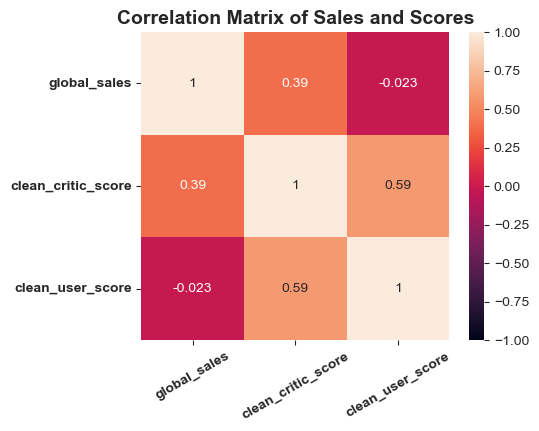

In [81]:
# Calculate the correlation coefficients between scores and sales
num_var = ['global_sales', 'clean_critic_score', 'clean_user_score']

plt.figure(figsize = (5,4))

sns.heatmap(ps4_data[num_var].corr(), vmin = -1, vmax = 1, square = True, annot = True)

plt.title('Correlation Matrix of Sales and Scores', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 30, fontweight = 'bold')
plt.yticks(rotation = 0, fontweight = 'bold')

plt.show()

- Correlation coefficients between `critic_score` and `global_sales`: 0.39
- Correlation coefficients between `user_score` and `global_sales`:-0.023

The above results provide statistical evidence to reniforce the conclusions drawn from the scatter plots.

[Back to Contents](#back)

### Sales of the Same Games from Different Platforms <a id='same_games'></a>

In the data cleaning stage, we found that popular games were released on multiple platforms. Let's investigate if there is any notable difference in game sales across different platform.

In [82]:
# Create a dataframe containing the sales of a game from different platforms
same_games = final_data.pivot_table(
    index = 'name',
    columns = 'platform',    
    values = 'global_sales',
    aggfunc = 'sum'    
)

# Have a look at the table
same_games.head(3)

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,,
Beyblade Burst,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen: Olaf's Quest,0.59,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Calculate the total game sales across all the platforms
same_games['all_plat_sales'] = same_games.sum(axis = 1)

In [84]:
# Get the list of the top and middle tiers platform 'XOne', '3DS', 'X360', 'PS3', 'PS4'
top_plat = ['XOne', '3DS', 'X360', 'PS3', 'PS4']

# Create a dataframe containing the five platforms data
top_plat_games = same_games[top_plat + ['all_plat_sales']]

# Get the top eight games which have sales in all the five platforms
top_plat_games = top_plat_games.dropna().sort_values('all_plat_sales', ascending = False).head(8)

# Have a look at the top eight games
top_plat_games

platform,XOne,3DS,X360,PS3,PS4,all_plat_sales
name,,,,,,
FIFA 15,2.18,0.46,2.92,4.28,6.08,17.37
FIFA 14,1.16,0.23,4.22,6.46,3.01,16.46
LEGO Marvel Super Heroes,1.05,0.89,2.22,1.83,1.62,9.41
Skylanders SWAP Force,0.31,0.24,1.32,1.02,0.38,6.00
The LEGO Movie Videogame,0.53,0.69,1.27,0.93,0.67,5.09
LEGO Jurassic World,0.66,0.62,0.87,0.85,0.90,4.69
Skylanders: Trap Team,0.37,0.28,0.89,0.67,0.44,4.30
Lego Batman 3: Beyond Gotham,0.44,0.45,0.89,0.73,0.92,4.26


In [85]:
# Drop the all_plat_sales before stacking
top_plat_games = top_plat_games.drop(columns = ['all_plat_sales'])

# Convert the platform column to row data
top_plat_games = top_plat_games.stack().to_frame().reset_index()

# Rename the columns
top_plat_games.columns = ['name', 'platform', 'global_sales']

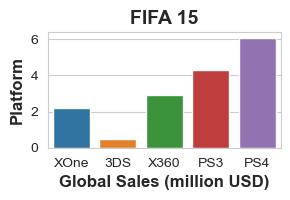

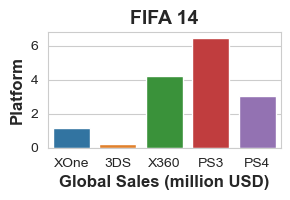

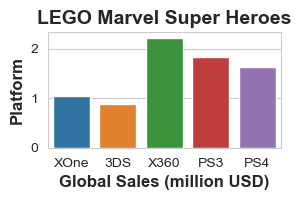

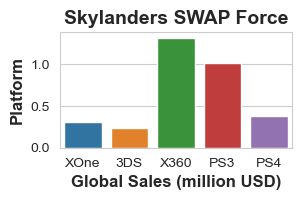

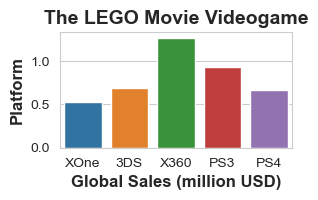

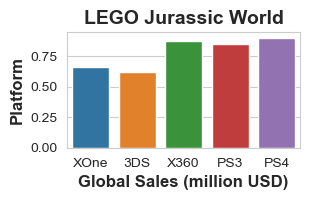

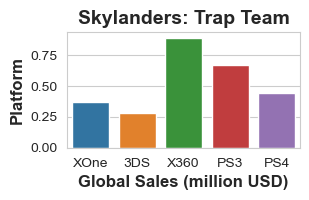

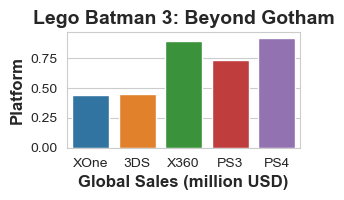

In [86]:
# Plot a bar chart for each top games to show the variation in sales across platforms
for game in top_plat_games['name'].unique():   
    sns_barplot(data = top_plat_games.query('name == @game'), x = 'platform', y = 'global_sales', figsize = (3,1.5),
                title = game, xlabel = 'Global Sales (million USD)', ylabel = 'Platform',
                sort = False, ascending = False, horizontal = False, bar_label = False)

**Intermediate conclusion**

By comparing the sales across various platforms, `X360` platform secured either the first or second position in six out of the top eight best-selling games. This implies that X360 outperforms other platforms in the top and middle tiers when a game is released across multiple platforms.

[Back to Contents](#back)

### Distribution and Sales of Games per Genre <a id='sales_per_genre'></a>

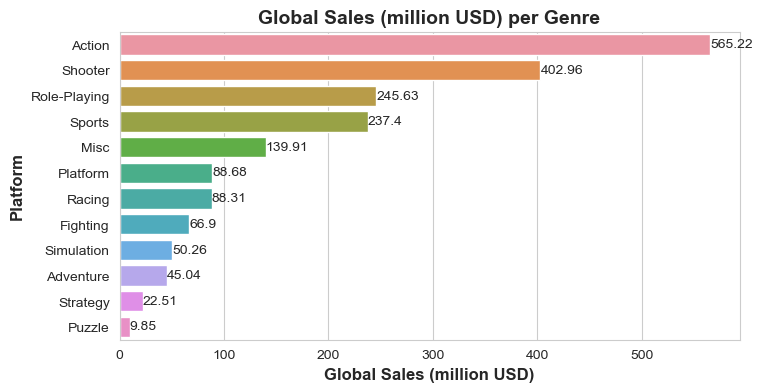

In [87]:
# Plot a bar chart to show the distribution of games per genre
sns_barplot(data = final_data, x = 'genre', y = 'global_sales', figsize = (8,4),
            title = 'Global Sales (million USD) per Genre', 
            xlabel = 'Global Sales (million USD)', ylabel = 'Platform',
            agg = 'sum', sort = True, ascending = False, horizontal = True, bar_label = True)

In the recent six years, the top game genres were `action`, `shooter`, `role-playing` and `sports`. Let's break down the distribtuion by years and identify if there is any other pattern.

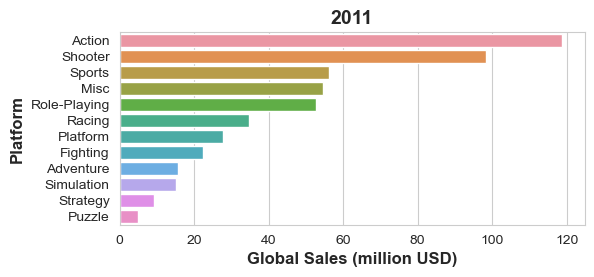

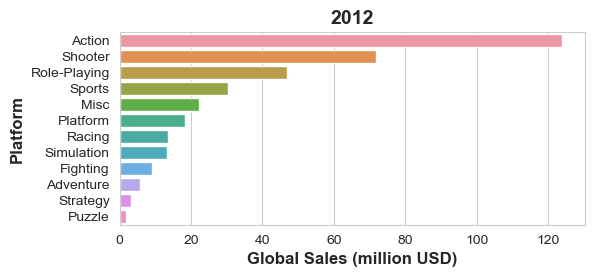

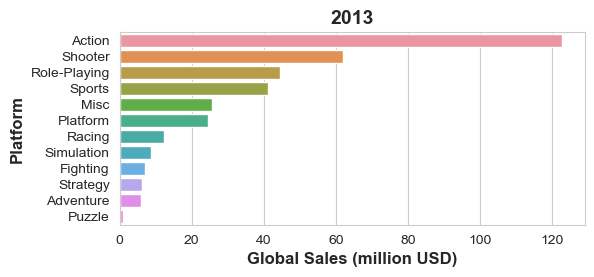

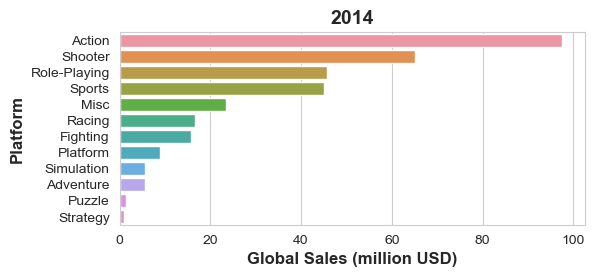

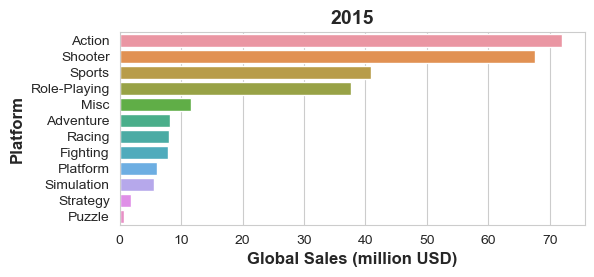

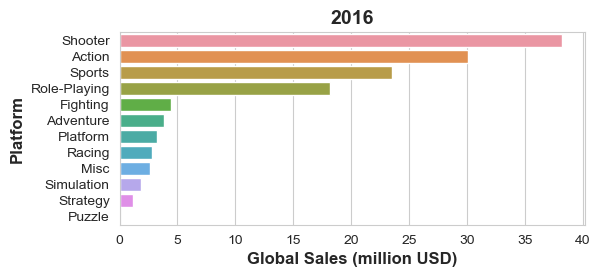

In [88]:
# For each year, plot a bar chart to show the distribution of games per genre
for year in final_data['year_of_release'].sort_values().unique():
    sns_barplot(data = final_data.query('year_of_release == @year'), x = 'genre', y = 'global_sales', figsize = (6,2.5),
                title = int(year), xlabel = 'Global Sales (million USD)', ylabel = 'Platform',
                agg = 'sum', sort = True, ascending = False, horizontal = True)

**Intermediate conclusion**
- Over the past six years, the most profitable `genre` have been `action`, `shooter`, `role-playing`, `sports` while `strategy` and `puzzle` have consistently the least profitable. 
- `action` games dominated in sales compared to the other game `genre` until 2014. However, starting from 2015, the sales of `shooter` began to catch up `action` games and eventually overtook `action` games in 2016. This shift highlights the growing potential of the `shooter` games.

[Back to Contents](#back)

## 5. Regional Sales Analysis <a id='regional_sales'></a>

---

The following function automate the tasks for regional sales analysis.

In [89]:
def top_regional_platform_pie(data, compare_column):
    """
    This function creates three pie charts to compare the regional sales based on a factor
    """
    
    # Prepare data for plotting pie charts
    na_data = final_data.groupby(compare_column)['na_sales'].sum().sort_values().tail()
    eu_data = final_data.groupby(compare_column)['eu_sales'].sum().sort_values().tail()
    jp_data = final_data.groupby(compare_column)['jp_sales'].sum().sort_values().tail()    
    
    # Set up figure
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (13, 4))
    fig.suptitle(f'Top {compare_column.capitalize()} in Sales per Region', 
                 fontsize = 15, fontweight = 'bold', y = 1.02)
    
    # Plot the three pie charts
    ax1.pie(na_data.values, labels = na_data.index, autopct = '%1.1f%%',
            startangle = 90, shadow = True, explode = (0, 0, 0, 0, 0.1))
    ax1.axis('equal')

    ax2.pie(eu_data.values, labels = eu_data.index, autopct = '%1.1f%%',
            startangle = 90, shadow = True, explode = (0, 0, 0, 0, 0.1))
    ax2.axis('equal')

    ax3.pie(jp_data.values, labels = jp_data.index, autopct = '%1.1f%%',
            startangle = 90, shadow = True, explode = (0, 0, 0, 0, 0.1))
    ax3.axis('equal')
    
    # Set the titles
    ax1.set_title(f'NA Top {compare_column.capitalize()}', fontsize = 12, fontweight = 'bold')
    ax2.set_title(f'EU Top {compare_column.capitalize()}', fontsize = 12, fontweight = 'bold')
    ax3.set_title(f'JP Top {compare_column.capitalize()}', fontsize = 12, fontweight = 'bold')

    plt.show()

[Back to Contents](#back)

---

### Regional Market Shares per Platform <a id='regional_per_platform'></a>

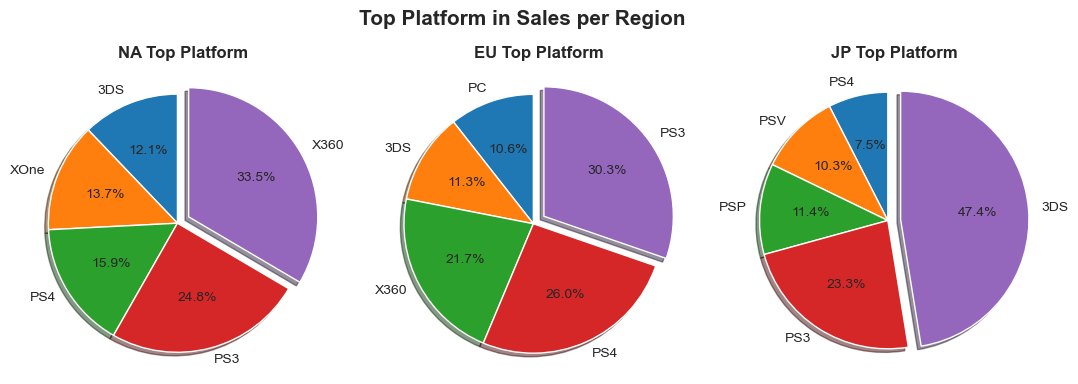

In [90]:
# Find the top five platforms in each region in terms of sales
top_regional_platform_pie(data = final_data, compare_column = 'platform')

**Intermediate conclusion**
- According to the data from 2011 to 2016, the top three `platform` with the highest market shares are listed in descending order as follows:
    1. `NA` region: `X360`(33.5%), `PS3`(24.9%), `PS4`(15.9%)
    2. `EU` region: `PS3`(30.4%), `PS4`(26.0%), `X360`(21.8%)
    3. `JP` region: `3DS`(47.4%), `PS3`(23.3%), `PSP`(11.5%)
- Overall, the `NA` and `EU` regions favoured the same three gaming `platform`, albeit in different ranking orders. 
- In contrast, the `JP` region displayed a distinct pattern, with `3DS` standing as the sole leader in sales, accounting for approximately half of the market share. Compared to `NA` and `EU` gamers, `JP` gamers may have a preference for portable gaming platforms like 3DS and PSP, allowing them to play games wherever they are.

[Back to Contents](#back)

### Regional Market Shares per Genre <a id='regional_per_genre'></a>

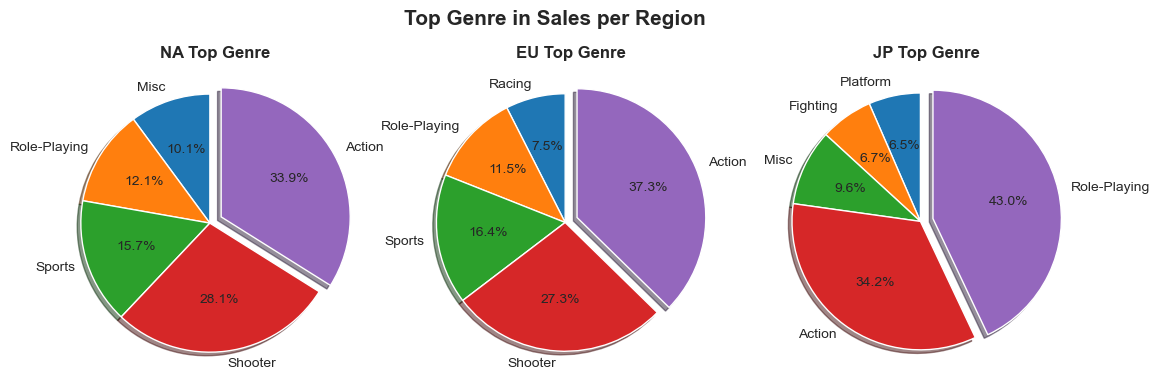

In [91]:
# Find the top five platforms in each region in terms of sales
top_regional_platform_pie(data = final_data, compare_column = 'genre')

**Intermediate conclusion: Genres**
- According to the data from 2011 to 2016, the top three `genre` with the highest market shares are listed in descending order as follows:
    1. `NA` region: `action`(33.9%), `shooter`(28.1%), `sports`(15.7%)
    2. `EU` region: `action`(37.3%), `shooter`(27.3%), `sports`(16.4%)
    3. `JP` region: `role-playing`(43.0%), `action`(34.3%), `misc`(9.6%)
- Notably, The gamers from `NA` and `EU` showed almost identical preference in game `genre`. The top three game `genre` occupied nearly 80% of the market shares.
- Conversely, `JP` gamers exhibited a unique genre preference, with `action` and `role-playing` genres representing 77.3% of the market share.

[Back to Contents](#back)

### Relationship between ESRB Rating and Game Sales <a id='rating_sales'></a>

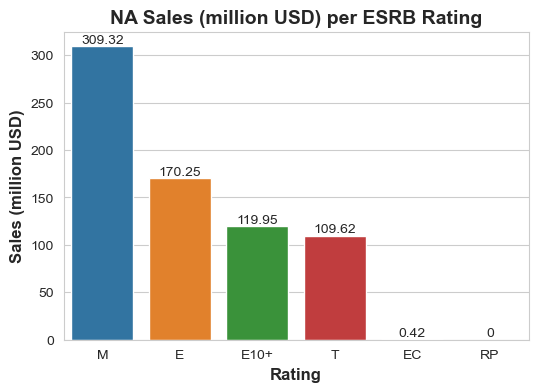

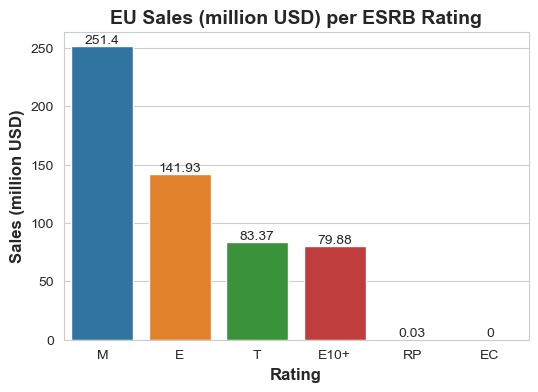

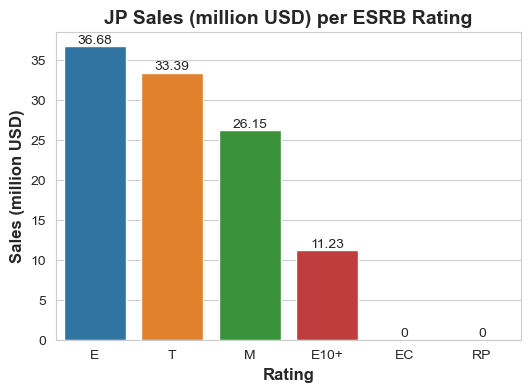

In [92]:
# Plot barcharts for the three regions to compare sales per rating
regional_sales = ['na_sales', 'eu_sales', 'jp_sales']

for sales in regional_sales:
    title = sales.split("_")[0].upper()
    sns_barplot(data = final_data, x = 'rating', y = sales, figsize = (6,4),             
                title = f'{title} Sales (million USD) per ESRB Rating',
                xlabel = 'Rating', ylabel = 'Sales (million USD)', agg = 'sum',
                sort = True, horizontal = False, bar_label = True)

**Intermediate conclusion**

- By analysing the data From 2011 to 2016, each of the three regions had one dominant `ESRB` rating associated with the highest sales. The `NA` and `EU` gamers favoured the games with `M` (Mature 17+) `rating` while the `JP` region gamers leaned towards the `T` (Teen) `rating` games.
- On the other hand, all the three regions shared two ESRB `rating` with minimal or negligible sales, namely `EC` (Early Childhood) and `RP` (Rating Pending).

[Back to Contents](#back)

## 6. Hypothesis Testing <a id='hypothesis_testing'></a>

---

The following function automate the tasks in hypotheses testing stage.

In [93]:
def check_stat(group, check, variable):
    """
    This function calculates the mean, variance and standard deviation
    of a variable from two groups be used in the hypothesis test
    """
    
    # Create data for checking
    data_0 = final_data[final_data[group] == check[0]][variable].dropna()
    data_1 = final_data[final_data[group] == check[1]][variable].dropna()
    
    # Calculate necessary descriptive statistics
    count_0 = data_0.count()
    mean_0 = np.mean(data_0)
    var_0 = np.var(data_0)
    std_0 = np.std(data_0)
    
    count_1 = data_1.count()
    mean_1 = np.mean(data_1)
    var_1 = np.var(data_1)
    std_1 = np.std(data_1)
        
    # Show the results
    print(f'Number of {variable} in {check[0]} is: {count_0}')
    print(f'The mean of {variable} in {check[0]} is: {mean_0:.2f}')
    print(f'The variance of {variable} in {check[0]} is: {var_0:.4f}')
    print(f'The standard deviation of {variable} in {check[0]} is: {std_0:.4f}')
    print('-'*60)
    print()
    print(f'Number of {variable} in {check[1]} is: {count_1}')
    print(f'The mean of {variable} in {check[1]} is: {mean_1:.2f}')
    print(f'The variance of {variable} in {check[1]} is: {var_1:.4f}')
    print(f'The standard deviation of {variable} in {check[1]} is: {std_1:.4f}')
    print('-'*60)
    print()
    print(f'Ratio of variances: {var_0/var_1:.4f}')   

In [94]:
def check_equalvar_normality(group, check, variable, alpha):
    """
    This function test the normality assumption of a t-test
    And check if the variances are equal
    """  
    # Create data for checking
    data_0 = final_data[final_data[group] == check[0]][variable].dropna()
    data_1 = final_data[final_data[group] == check[1]][variable].dropna()
    
    # Set up figure
    sns.set_style('whitegrid')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))   
    
    # Plot histograms to check normality of samples
    sns.histplot(data = data_0, bins = np.arange(1,11), kde = True, color = 'orange', ax = ax1)
    sns.histplot(data = data_1, bins = np.arange(1,11), kde = True, color = 'red', ax = ax2)
    
    fig.suptitle('Distribution of the Two Samples', fontsize=15, fontweight='bold')
    
    ax1.set_title(f'Sample 1: {check[0]} {variable}',
                  fontsize = 13, fontweight = 'bold')
    ax1.set_xlabel(variable, fontsize = 11, fontweight = 'bold')
    ax1.set_ylabel('Number of Users', fontsize = 11, fontweight = 'bold')  
    
    ax2.set_title(f'Sample 2: {check[1]} {variable}',
                  fontsize = 13, fontweight = 'bold')    
    ax2.set_xlabel(variable, fontsize = 11, fontweight = 'bold')
    ax2.set_ylabel('Number of Users', fontsize = 11, fontweight = 'bold')    
    
    plt.show() 
    print('*'*120)
    
    # Levene Test for equal variances
    levene_result = st.levene(data_0, data_1, center = 'median')    
    
    # Show levene test result
    print('Levene Test for Equal Variances:')
    print('Null Hypothesis: Variances are equal for the two samples.')
    print('Significance level:', alpha)
    print()
    print('p_value:', levene_result.pvalue)
    
    if levene_result.pvalue < alpha:
        print('We reject the null hypothesis.')
    else:
        print('We failed to reject the null hypothesis.')

In [95]:
def t_test(group, check, variable, alpha, equal_var = True):
    # Create data for checking
    data_0 = final_data[final_data[group] == check[0]][variable].dropna()
    data_1 = final_data[final_data[group] == check[1]][variable].dropna()
    
    # Conduct two sample independent t-test
    t_test_result = st.ttest_ind(data_0, data_1, equal_var = equal_var)

    print('p_value:', t_test_result.pvalue)

    if t_test_result.pvalue < alpha:
        print('We reject the null hypothesis.')
    else:
        print('We fail to to reject the null hypothesis.')

[Back to Contents](#back)

---

### Hypothesis 1: Average User Scores of the Xbox One and PC Platforms are the Same. <a id='hypothesis_1'></a>

In [96]:
# Check the descriptive statistics of two samples
check_stat('platform', ['XOne', 'PC'], 'clean_user_score')

Number of clean_user_score in XOne is: 207
The mean of clean_user_score in XOne is: 6.61
The variance of clean_user_score in XOne is: 1.8875
The standard deviation of clean_user_score in XOne is: 1.3739
------------------------------------------------------------

Number of clean_user_score in PC is: 320
The mean of clean_user_score in PC is: 6.46
The variance of clean_user_score in PC is: 2.6051
The standard deviation of clean_user_score in PC is: 1.6140
------------------------------------------------------------

Ratio of variances: 0.7245


Let the population mean of user scores of Xbox One platform be \$\mu_{1}$

Let the population mean of user scores of PC platform be \$\mu_{2}$

**Sample 1: Xbox One Gamers**
- Number of observations: \$n_{1} \= 207$

- Monthly revenue mean: \$\bar{x}_{1} \= 6.61$

- Monthly revenue standard deviation: \$s_{1} \= 1.3739$

**Sample 2: PC Gamers**
- Number of observations: \$n_{2} \= 320$

- Monthly revenue mean: \$\bar{x}_{2} \= 6.46$

- Monthly revenue standard deviation: \$s_{2} \= 1.6140$

\$H_{0}: \mu_{1} \= \mu_{2}\$

\$H_{1}: \mu_{1} \ne \mu_{2}\$

The two samples are independent and we are testing if their means differ, a **two-sample independent t-test** will be performed.

To perform a two-sample independent t-test, it is assumed that both samples follow a normal distribution.Hence, a histogram will be plotted for each sample to check the normality.

The ratio of the the sample variances is 0.7245, it is likely that we can assume their variances are equal. A **Levene's test** will be conducted before we make a conclusion.

To test this hypothesis, it is decided to take a significance level of 0.05

Significance level: \$\alpha \= 0.05$

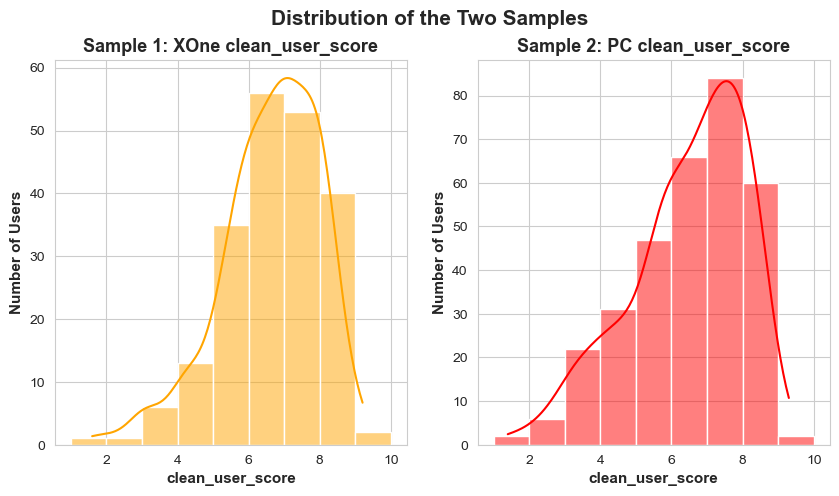

************************************************************************************************************************
Levene Test for Equal Variances:
Null Hypothesis: Variances are equal for the two samples.
Significance level: 0.05

p_value: 0.01271636739864283
We reject the null hypothesis.


In [97]:
# Check the distributions and equal variances
check_equalvar_normality('platform', ['XOne', 'PC'], 'clean_user_score', alpha = 0.05)

The distributions of the two samples are close to normal. Also, with a sample size of greater than 30, by utilising central limit theorem, the sample mean distribution tends to be normal and t-test can be applied.

The Levene Test indicates that we can assume the variances are not equal.

In [98]:
# Test if the mean of the two samples are equal
t_test('platform', ['XOne', 'PC'], 'clean_user_score', alpha = 0.05, equal_var = False)

p_value: 0.25505997880924625
We fail to to reject the null hypothesis.


**Since the p-value of 0.2551 is higher than the significance level of 0.05, we fail to reject the null hypothesis \$H_{0}$. We do not have enough evidence to conclude that the user scores from Xbox One gamers and PC gamers are significantly different.**

[Back to Contents](#back)

### Hypothesis 2: Average User Scores for the Action and Sports Genres are Different. <a id='hypothesis_2'></a>

In [99]:
# Check the descriptive statistics of two samples
check_stat('genre', ['Action', 'Sports'], 'clean_user_score')

Number of clean_user_score in Action is: 787
The mean of clean_user_score in Action is: 6.79
The variance of clean_user_score in Action is: 1.8316
The standard deviation of clean_user_score in Action is: 1.3534
------------------------------------------------------------

Number of clean_user_score in Sports is: 292
The mean of clean_user_score in Sports is: 5.63
The variance of clean_user_score in Sports is: 2.8156
The standard deviation of clean_user_score in Sports is: 1.6780
------------------------------------------------------------

Ratio of variances: 0.6505


Let the population mean of user scores of action game genre be \$\mu_{1}$

Let the population mean of user scores of sports game genre be \$\mu_{2}$

**Sample 1: Xbox One Gamers**
- Number of observations: \$n_{1} \= 787$

- Monthly revenue mean: \$\bar{x}_{1} \= 6.79$

- Monthly revenue standard deviation: \$s_{1} \= 1.3534$

**Sample 2: PC Gamers**
- Number of observations: \$n_{2} \= 292$

- Monthly revenue mean: \$\bar{x}_{2} \= 5.63$

- Monthly revenue standard deviation: \$s_{2} \= 1.6780$

\$H_{0}: \mu_{1} \= \mu_{2}\$

\$H_{1}: \mu_{1} \ne \mu_{2}\$

The two samples are independent and we are testing if their means differ, a **two-sample independent t-test** will be performed.

Similarly, a histogram will be plotted for each sample to check the normality.

The ratio of the the sample variances is 0.6509, it is likely that we can assume their variances are not equal. A **Levene's test** will be conducted before we make a conclusion.

To test this hypothesis, it is decided to take a significance level of 0.05

Significance level: \$\alpha \= 0.05$

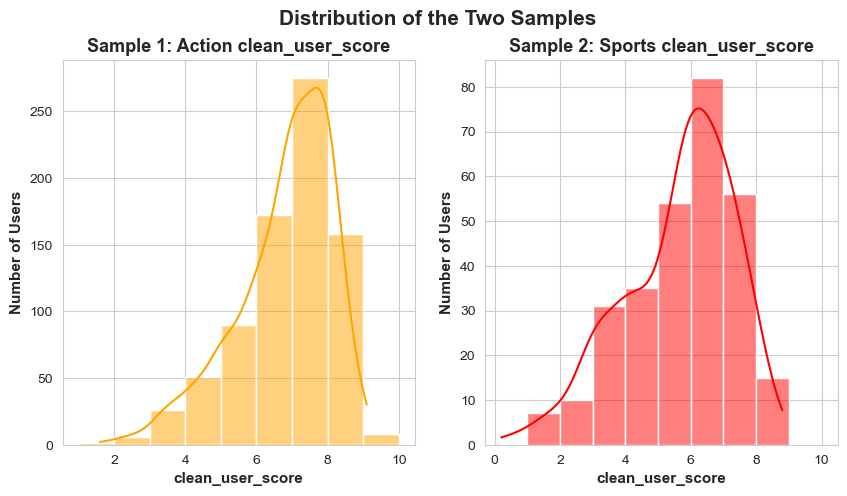

************************************************************************************************************************
Levene Test for Equal Variances:
Null Hypothesis: Variances are equal for the two samples.
Significance level: 0.05

p_value: 3.2175259536499445e-05
We reject the null hypothesis.


In [100]:
# Check the distributions and equal variances
check_equalvar_normality('genre', ['Action', 'Sports'], 'clean_user_score', alpha = 0.05)

The distributions of the two samples are close to normal.Besides that, with sample size greater than 30, the sample mean distribution tends to be normal according to central limit theorem.

The Levene Test indicates that we can assume the variances are not equal.

In [101]:
# Test if the mean of the two samples are equal
t_test('genre', ['Action', 'Sports'], 'clean_user_score', alpha = 0.05, equal_var = False)

p_value: 1.739611768515285e-23
We reject the null hypothesis.


**Since the p-value of 1.74e-23 is lower than the significance level of 0.05, we reject the null hypothesis \$H_{0}$. We have enough evidence to conclude that the user scores for action and sports game genres are significantly different.**

[Back to Contents](#back)

## 7. General Conclusion <a id='general_conclusion'></a>
**Data Exploration**

The information in the dataset are sufficient to conduct the relevant analysis and test the hypotheses. However, there are issues need to be addresed such as wrong data types and the capitalised column names. Besides that, that are substantial amount of missing values in the six columns of the dataset.

**Data Cleaning**

- The column names were changed to lowercase.
- The `K-A` rating was replaced with `E`.
- The two rows of missing values in `game` and `genre` were dropped.
- The missingness of data in `year_of_release` is missing completely at random **(MCAR)**. The missing values were filled based on the factors `name`, `platform` and `genre` by using random samples.
- The missingness of data in `critic_score`, `user_score` and `ratings` are missing at random **(MAR)**. The missing values were filled as follows:
    - missing values of `critic_score` were filled based on `name`, `user_score` and `critic_score` of same games.
    - missing values of `critic_score` were filled based on `name`, `critic_score` and `user_score` of same games.
    - missing values of `ratings` were filled based on `name` of same games, `platform` and `genre` factors.

**Exploratory Data Analysis and Regional Sales Analysis**

Important findings:
- From 2012, the number of games dropped significantly and maintained at about 600 games every year.
- Over the past 37 years, 'PS2,' 'X360,' 'PS3,' 'Wii,' 'DS,' and 'PS' have significantly outperformed other platforms in terms of 'global_sales,'
- After an initial two-year growth period, gaming platforms reached their peak period of popularity, which typically spanned around five years. Following this peak, they gradually faded out from the competition over the next three years. Therefore, the analysis in this project will be carried out from the year of 2011 to 2016.
- `PS3` and `X360` are declining in sales and it is likely that they will phase out of the market within the next two years.
- `PS4` and `Xone` are showing increasing popularity and we should priotise selling games for these platform.
- `Wii` and `WiiU` may have had fewer games released compared to the other top platforms, but the individual game sales were strong.
- There appears to be a moderate positive relationship between `critic_score` of 50 and above and `global_sales`.
- `user_score` may not significantly impact game sales.
- X360 outperforms other platforms in the top and middle tiers when a game is released across multiple platforms.
- The `NA` and `EU` regions favoured the same three gaming `platform` which were `X360`, `PS3` and `PS4`, albeit in different ranking orders. In contrast, the `JP` region displayed a distinct pattern, with `3DS` standing as the sole leader in sales, accounting for approximately half of the market share.
- The gamers from `NA` and `EU` showed almost identical preference in game `genre`. The top three game `genre` namely `action`, `shooter` and `sports` occupied nearly 80% of the market shares. Conversely, `JP` gamers exhibited a unique genre preference, with `action` and `role-playing` genres representing 77.3% of the market share.


**Hypothesis testing**

Two hypotheses have been tested:
1. Average user scores of the Xbox One and PC platforms are the same.

\$H_{0}: \mu_{1} \= \mu_{2}\$

\$H_{1}: \mu_{1} \ne \mu_{2}\$

Significance level: \$\alpha \= 0.05$

After conducting the statistical test - two-sample independent t-test, we have the following result:

**Since the p-value of 0.2551 is higher than the significance level of 0.05, we fail to reject the null hypothesis \$H_{0}$. We do not have enough evidence to conclude that the user scores from Xbox One gamers and PC gamers are significantly different.**

1. Average user scores of the Xbox One and PC platforms are the same.

\$H_{0}: \mu_{1} \= \mu_{2}\$

\$H_{1}: \mu_{1} \ne \mu_{2}\$

Significance level: \$\alpha \= 0.05$

After conducting the statistical test - two-sample independent t-test, we have the following result:

**Since the p-value of 1.74e-23 is lower than the significance level of 0.05, we reject the null hypothesis \$H_{0}$. We have enough evidence to conclude that the user scores for action and sports game genres are significantly different.**

[Back to Contents](#back)
